# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [2]:
# Import warnings
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
!pip install matplotlib==3.10.0;

In [6]:
!conda install matplotlib=3.10.0;

Channels:
 - defaults
Platform: osx-arm64
doneecting package metadata (repodata.json): - 
doneing environment: - 

# All requested packages already installed.



In [8]:
# Import the libraries you will be using for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime


In [10]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.3
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [14]:
# Try loading one file

df = pd.read_parquet('Datasets and Dictionary/trip_records/2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [21]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload
sampleData = pd.DataFrame()
sample = df.sample(frac = 0.05, random_state = 42)
sampleData = pd.concat( [sampleData,sample])
sampleData

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
323412,1,2023-01-05 07:50:08,2023-01-05 08:02:04,2.0,1.90,1.0,N,239,236,1,13.5,2.5,0.5,2.50,0.00,1.0,20.00,2.5,0.00
1491266,2,2023-01-17 07:47:24,2023-01-17 08:00:50,5.0,1.86,1.0,N,239,162,1,14.2,0.0,0.5,3.64,0.00,1.0,21.84,2.5,0.00
2385670,2,2023-01-25 21:57:59,2023-01-25 22:00:33,1.0,0.50,1.0,N,162,170,1,5.1,1.0,0.5,2.02,0.00,1.0,12.12,2.5,0.00
766545,2,2023-01-09 19:36:54,2023-01-09 19:52:01,2.0,2.56,1.0,N,162,262,1,17.0,2.5,0.5,4.70,0.00,1.0,28.20,2.5,0.00
980153,1,2023-01-11 22:19:13,2023-01-11 22:32:37,1.0,2.80,1.0,N,164,231,1,14.9,3.5,0.5,3.98,0.00,1.0,23.88,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2458862,2,2023-01-26 16:36:18,2023-01-26 16:42:36,1.0,0.96,1.0,N,226,260,2,7.9,2.5,0.5,0.00,0.00,1.0,11.90,0.0,0.00
1685425,1,2023-01-18 23:17:20,2023-01-18 23:22:57,1.0,1.30,1.0,N,239,238,1,8.6,3.5,0.5,2.70,0.00,1.0,16.30,2.5,0.00
726902,2,2023-01-09 12:50:57,2023-01-09 13:13:26,2.0,8.69,1.0,N,138,247,1,37.3,5.0,0.5,10.07,6.55,1.0,61.67,0.0,1.25
958184,2,2023-01-11 19:42:23,2023-01-11 20:09:57,2.0,17.40,2.0,N,132,170,1,70.0,5.0,0.5,5.00,6.55,1.0,90.55,2.5,0.00


In [23]:
# from google.colab import drive
# drive.mount('/content/drive')

In [25]:
!pwd

/Users/dewangshishodia/Downloads/Starter Notebook - EDA NYC Taxi


In [38]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
os.chdir('/Users/dewangshishodia/Downloads/Starter Notebook - EDA NYC Taxi/Datasets and Dictionary/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        monthData = pd.read_parquet(file_path)
        monthData['tpep_pickup_datetime'] = pd.to_datetime(monthData['tpep_pickup_datetime'])

        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampleData = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for date in monthData['tpep_pickup_datetime'].dt.date.unique():

            # Iterate through each hour of the selected date
            dayData = monthData[monthData['tpep_pickup_datetime'].dt.date == date]
            for hour in dayData['tpep_pickup_datetime'].dt.hour.unique():

                # Sample 5% of the hourly data randomly
                hourData = dayData[dayData['tpep_pickup_datetime'].dt.hour == hour]
                sample = hourData.sample(frac=0.05, random_state=42)
                
                # add data of this hour to the dataframe
                sampleData = pd.concat([sampleData, sample])
                
        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampleData])

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

print(df.head())

Error reading file .DS_Store: Could not open Parquet input source '<Buffer>': Parquet magic bytes not found in footer. Either the file is corrupted or this is not a parquet file.
         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1788            2  2023-12-01 00:27:51   2023-12-01 00:50:12              1.0   
3196699         2  2023-12-01 00:38:48   2023-12-01 01:01:55              NaN   
1408            2  2023-12-01 00:06:19   2023-12-01 00:16:57              1.0   
3196663         2  2023-12-01 00:00:50   2023-12-01 00:14:37              NaN   
3613            2  2023-12-01 00:16:07   2023-12-01 00:19:17              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
1788              3.99         1.0                  N           148   
3196699           4.79         NaN               None           231   
1408              1.05         1.0                  N           161   
3196663           2.08         NaN               N

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [42]:
# Store the df in csv/parquet
df.to_csv('mergedTaxiData.csv')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [43]:
# Load the new data file

df = pd.read_csv('mergedTaxiData.csv')

In [46]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,airport_fee
0,1788,2,2023-12-01 00:27:51,2023-12-01 00:50:12,1.0,3.99,1.0,N,148,50,...,23.30,1.0,0.5,5.66,0.0,1.0,33.96,2.5,0.0,NaN
1,3196699,2,2023-12-01 00:38:48,2023-12-01 01:01:55,NaN,4.79,NaN,NaN,231,61,...,22.43,0.0,0.5,3.00,0.0,1.0,29.43,NaN,NaN,NaN
2,1408,2,2023-12-01 00:06:19,2023-12-01 00:16:57,1.0,1.05,1.0,N,161,161,...,10.70,1.0,0.5,3.14,0.0,1.0,18.84,2.5,0.0,NaN
3,3196663,2,2023-12-01 00:00:50,2023-12-01 00:14:37,NaN,2.08,NaN,NaN,137,144,...,17.22,0.0,0.5,0.00,0.0,1.0,21.22,NaN,NaN,NaN
4,3613,2,2023-12-01 00:16:07,2023-12-01 00:19:17,1.0,0.40,1.0,N,68,68,...,5.10,1.0,0.5,0.00,0.0,1.0,10.10,2.5,0.0,NaN


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 21 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   VendorID               int64  
 2   tpep_pickup_datetime   object 
 3   tpep_dropoff_datetime  object 
 4   passenger_count        float64
 5   trip_distance          float64
 6   RatecodeID             float64
 7   store_and_fwd_flag     object 
 8   PULocationID           int64  
 9   DOLocationID           int64  
 10  payment_type           int64  
 11  fare_amount            float64
 12  extra                  float64
 13  mta_tax                float64
 14  tip_amount             float64
 15  tolls_amount           float64
 16  improvement_surcharge  float64
 17  total_amount           float64
 18  congestion_surcharge   float64
 19  Airport_fee            float64
 20  airport_fee            float64
dtypes: float64(13), int64(5), object(3)
memory usage: 303.

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [52]:
# Fix the index and drop any columns that are not needed

df.drop(columns=['Unnamed: 0','store_and_fwd_flag'], axis=1, inplace=True)

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [55]:
# Combine the two airport fee columns

df[['Airport_fee','airport_fee']]

,Airport_fee,airport_fee
0,0.00,NaN
1,NaN,NaN
2,0.00,NaN
3,NaN,NaN
4,0.00,NaN
...,...,...
1896395,0.00,NaN
1896396,0.00,NaN
1896397,1.75,NaN
1896398,0.00,NaN


In [57]:
df['airport_fee'].isna().sum()

1747917

In [59]:
df['Airport_fee'].isna().sum()

213357

In [61]:
df['airport_fee'] = df['Airport_fee'].fillna(df['airport_fee'])

In [63]:
df['airport_fee'].isna().sum()

64874

In [65]:
df.drop(columns=['Airport_fee'], axis=1, inplace=True)

In [67]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-12-01 00:27:51,2023-12-01 00:50:12,1.0,3.99,1.0,148,50,1,23.30,1.0,0.5,5.66,0.0,1.0,33.96,2.5,0.0
1,2,2023-12-01 00:38:48,2023-12-01 01:01:55,NaN,4.79,NaN,231,61,0,22.43,0.0,0.5,3.00,0.0,1.0,29.43,NaN,NaN
2,2,2023-12-01 00:06:19,2023-12-01 00:16:57,1.0,1.05,1.0,161,161,1,10.70,1.0,0.5,3.14,0.0,1.0,18.84,2.5,0.0
3,2,2023-12-01 00:00:50,2023-12-01 00:14:37,NaN,2.08,NaN,137,144,0,17.22,0.0,0.5,0.00,0.0,1.0,21.22,NaN,NaN
4,2,2023-12-01 00:16:07,2023-12-01 00:19:17,1.0,0.40,1.0,68,68,1,5.10,1.0,0.5,0.00,0.0,1.0,10.10,2.5,0.0


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   PULocationID           int64  
 7   DOLocationID           int64  
 8   payment_type           int64  
 9   fare_amount            float64
 10  extra                  float64
 11  mta_tax                float64
 12  tip_amount             float64
 13  tolls_amount           float64
 14  improvement_surcharge  float64
 15  total_amount           float64
 16  congestion_surcharge   float64
 17  airport_fee            float64
dtypes: float64(12), int64(4), object(2)
memory usage: 260.4+ MB


**2.1.4** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [72]:
# check where values of fare amount are negative

negFares = df[df['fare_amount'] < 0]
negFares

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee


Did you notice something different in the `RatecodeID` column for above records?

In [75]:
# Analyse RatecodeID for the negative fare amounts
rateCodeIDValues = df['RatecodeID'].unique()
rateCodeIDValues
# ---- No negative values

array([ 1., nan,  5.,  4.,  2.,  3., 99.,  6.])

In [77]:
# Find which columns have negative values

negColumns = []
for column in df.select_dtypes(include=['float64', 'int64']):
    if (df[column] < 0).any():
        negColumns.append(column)
        
negColumns

['extra',
 'mta_tax',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee']

In [78]:
# fix these negative values

df = df[~df[negColumns].lt(0).any(axis=1)] 
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-12-01 00:27:51,2023-12-01 00:50:12,1.0,3.99,1.0,148,50,1,23.30,1.0,0.5,5.66,0.0,1.0,33.96,2.5,0.0
1,2,2023-12-01 00:38:48,2023-12-01 01:01:55,NaN,4.79,NaN,231,61,0,22.43,0.0,0.5,3.00,0.0,1.0,29.43,NaN,NaN
2,2,2023-12-01 00:06:19,2023-12-01 00:16:57,1.0,1.05,1.0,161,161,1,10.70,1.0,0.5,3.14,0.0,1.0,18.84,2.5,0.0
3,2,2023-12-01 00:00:50,2023-12-01 00:14:37,NaN,2.08,NaN,137,144,0,17.22,0.0,0.5,0.00,0.0,1.0,21.22,NaN,NaN
4,2,2023-12-01 00:16:07,2023-12-01 00:19:17,1.0,0.40,1.0,68,68,1,5.10,1.0,0.5,0.00,0.0,1.0,10.10,2.5,0.0


In [80]:
negColumns = []
for column in df.select_dtypes(include=['float64', 'int64']):
    if (df[column] < 0).any():
        negColumns.append(column)
        
print('There are '+str(len(negColumns))+' columns with negative values')

There are 0 columns with negative values


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [85]:
# Find the proportion of missing values in each column

round(df.isna().mean()*100,2)

VendorID                 0.00
tpep_pickup_datetime     0.00
tpep_dropoff_datetime    0.00
passenger_count          3.42
trip_distance            0.00
RatecodeID               3.42
PULocationID             0.00
DOLocationID             0.00
payment_type             0.00
fare_amount              0.00
extra                    0.00
mta_tax                  0.00
tip_amount               0.00
tolls_amount             0.00
improvement_surcharge    0.00
total_amount             0.00
congestion_surcharge     3.42
airport_fee              3.42
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [88]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
median_value = df['passenger_count'].median()
df['passenger_count'].fillna(median_value, inplace=True)

In [90]:
df['passenger_count'].isna().sum()

0

Did you find zeroes in passenger_count? Handle these.

In [93]:
zeroValues = df[df['passenger_count'] == 0]
zeroValues

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
152,1,2023-12-01 00:05:19,2023-12-01 00:15:55,0.0,2.5,1.0,162,262,1,13.5,3.50,0.5,3.70,0.00,1.0,22.20,2.5,0.00
173,1,2023-12-01 00:21:40,2023-12-01 00:46:40,0.0,17.6,2.0,132,162,1,70.0,4.25,0.5,14.06,6.94,1.0,96.75,2.5,1.75
349,1,2023-12-01 02:08:45,2023-12-01 02:13:30,0.0,1.4,1.0,249,186,1,7.9,3.50,0.5,2.55,0.00,1.0,15.45,2.5,0.00
382,1,2023-12-01 03:18:05,2023-12-01 03:24:36,0.0,1.3,1.0,90,137,1,8.6,3.50,0.5,1.63,0.00,1.0,15.23,2.5,0.00
530,1,2023-12-01 06:22:43,2023-12-01 06:25:21,0.0,0.3,1.0,237,161,1,5.1,2.50,0.5,1.80,0.00,1.0,10.90,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1896121,1,2023-06-30 18:14:54,2023-06-30 18:21:14,0.0,1.2,1.0,161,237,1,8.6,5.00,0.5,3.75,0.00,1.0,18.85,2.5,0.00
1896200,1,2023-06-30 22:06:30,2023-06-30 22:22:45,0.0,2.4,1.0,162,79,1,16.3,3.50,0.5,4.25,0.00,1.0,25.55,2.5,0.00
1896386,1,2023-06-30 22:25:07,2023-06-30 22:47:27,0.0,5.3,1.0,142,231,1,25.4,3.50,0.5,7.55,0.00,1.0,37.95,2.5,0.00
1896389,1,2023-06-30 22:03:14,2023-06-30 22:15:21,0.0,2.6,1.0,142,41,1,14.2,3.50,0.5,1.80,0.00,1.0,21.00,2.5,0.00


In [95]:
df['passenger_count'].mean()

1.3565788703494819

In [97]:
df = df[df['passenger_count'] != 0]
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-12-01 00:27:51,2023-12-01 00:50:12,1.0,3.99,1.0,148,50,1,23.30,1.00,0.5,5.66,0.00,1.0,33.96,2.5,0.00
1,2,2023-12-01 00:38:48,2023-12-01 01:01:55,1.0,4.79,NaN,231,61,0,22.43,0.00,0.5,3.00,0.00,1.0,29.43,NaN,NaN
2,2,2023-12-01 00:06:19,2023-12-01 00:16:57,1.0,1.05,1.0,161,161,1,10.70,1.00,0.5,3.14,0.00,1.0,18.84,2.5,0.00
3,2,2023-12-01 00:00:50,2023-12-01 00:14:37,1.0,2.08,NaN,137,144,0,17.22,0.00,0.5,0.00,0.00,1.0,21.22,NaN,NaN
4,2,2023-12-01 00:16:07,2023-12-01 00:19:17,1.0,0.40,1.0,68,68,1,5.10,1.00,0.5,0.00,0.00,1.0,10.10,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1896394,2,2023-06-30 22:33:23,2023-06-30 22:43:08,1.0,2.41,1.0,233,140,2,12.80,1.00,0.5,0.00,0.00,1.0,17.80,2.5,0.00
1896395,2,2023-06-30 22:50:16,2023-06-30 23:01:46,1.0,1.90,1.0,170,148,1,12.80,1.00,0.5,3.56,0.00,1.0,21.36,2.5,0.00
1896396,2,2023-06-30 22:06:15,2023-06-30 22:20:29,1.0,1.78,1.0,249,170,1,14.20,1.00,0.5,4.80,0.00,1.0,24.00,2.5,0.00
1896397,1,2023-06-30 22:10:20,2023-06-30 22:58:47,1.0,20.20,1.0,132,169,2,79.30,2.75,0.5,0.00,6.55,1.0,90.10,0.0,1.75


In [99]:
df['passenger_count'].mean()

1.378149509278704

In [101]:
zeroValues = df[df['passenger_count'] == 0]
zeroValues

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee


**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [104]:
# Fix missing values in 'RatecodeID'
df['RatecodeID'].value_counts()

RatecodeID
1.0     1700678
2.0       70865
99.0      10437
5.0       10051
3.0        6043
4.0        3689
6.0           3
Name: count, dtype: int64

In [106]:
mode_value = df['RatecodeID'].mode()[0]
df['RatecodeID'].fillna(median_value, inplace=True)
df['RatecodeID'].isna().sum()

0

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [109]:
# handle null values in congestion_surcharge

df['congestion_surcharge'].value_counts()

congestion_surcharge
2.5    1663055
0.0     138710
0.5          1
Name: count, dtype: int64

In [111]:
mode_value = df['congestion_surcharge'].mode()[0]
df['congestion_surcharge'].fillna(median_value, inplace=True)
df['congestion_surcharge'].isna().sum()

0

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [114]:
# Handle any remaining missing values

mode_value = df['airport_fee'].mode()[0]
df['airport_fee'].fillna(median_value, inplace=True)
df['airport_fee'].isna().sum()

0

In [116]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-12-01 00:27:51,2023-12-01 00:50:12,1.0,3.99,1.0,148,50,1,23.30,1.0,0.5,5.66,0.0,1.0,33.96,2.5,0.0
1,2,2023-12-01 00:38:48,2023-12-01 01:01:55,1.0,4.79,1.0,231,61,0,22.43,0.0,0.5,3.00,0.0,1.0,29.43,1.0,1.0
2,2,2023-12-01 00:06:19,2023-12-01 00:16:57,1.0,1.05,1.0,161,161,1,10.70,1.0,0.5,3.14,0.0,1.0,18.84,2.5,0.0
3,2,2023-12-01 00:00:50,2023-12-01 00:14:37,1.0,2.08,1.0,137,144,0,17.22,0.0,0.5,0.00,0.0,1.0,21.22,1.0,1.0
4,2,2023-12-01 00:16:07,2023-12-01 00:19:17,1.0,0.40,1.0,68,68,1,5.10,1.0,0.5,0.00,0.0,1.0,10.10,2.5,0.0


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [120]:
df.shape

(1866640, 18)

In [122]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,1.866640e+06,1.866640e+06,1.866640e+06,1.866640e+06,1.866640e+06,1.866640e+06,1.866640e+06,1.866640e+06,1.866640e+06,1.866640e+06,1.866640e+06,1.866640e+06,1.866640e+06,1.866640e+06,1.866640e+06,1.866640e+06
mean,1.744619e+00,1.378150e+00,3.875038e+00,1.619864e+00,1.652480e+02,1.640227e+02,1.162249e+00,1.996235e+01,1.561189e+00,4.953202e-01,3.555335e+00,5.998000e-01,9.990698e-01,2.903906e+01,2.262092e+00,1.735119e-01
std,4.414960e-01,8.699587e-01,1.304351e+02,7.312306e+00,6.400130e+01,6.981914e+01,5.076060e-01,1.063548e+02,1.820560e+00,4.840724e-02,4.056998e+00,2.193114e+00,2.804540e-02,1.072306e+02,6.971637e-01,4.840374e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,1.050000e+00,1.000000e+00,1.320000e+02,1.140000e+02,1.000000e+00,9.300000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.596000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,1.000000e+00,1.800000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.350000e+01,1.000000e+00,5.000000e-01,2.850000e+00,0.000000e+00,1.000000e+00,2.108000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,1.000000e+00,3.410000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,2.229000e+01,2.500000e+00,5.000000e-01,4.450000e+00,0.000000e+00,1.000000e+00,3.100000e+01,2.500000e+00,0.000000e+00
max,6.000000e+00,9.000000e+00,1.263605e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,1.431635e+05,2.080000e+01,4.000000e+00,2.230800e+02,1.430000e+02,1.000000e+00,1.431675e+05,2.500000e+00,1.750000e+00


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1866640 entries, 0 to 1896399
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   PULocationID           int64  
 7   DOLocationID           int64  
 8   payment_type           int64  
 9   fare_amount            float64
 10  extra                  float64
 11  mta_tax                float64
 12  tip_amount             float64
 13  tolls_amount           float64
 14  improvement_surcharge  float64
 15  total_amount           float64
 16  congestion_surcharge   float64
 17  airport_fee            float64
dtypes: float64(12), int64(4), object(2)
memory usage: 270.6+ MB


Number of outliers: 444


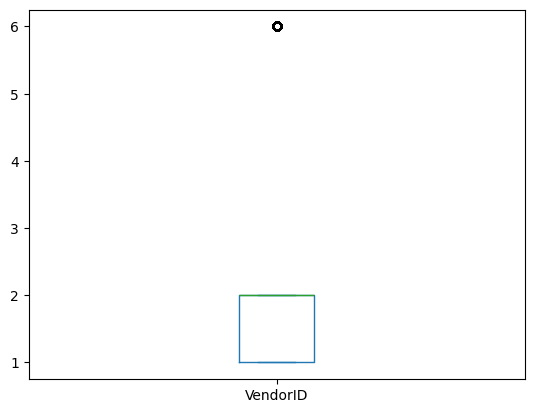

In [128]:
# 1. VendorID

Q1 = df['VendorID'].quantile(0.25)
Q3 = df['VendorID'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['VendorID'] < lower_bound) | (df['VendorID'] > upper_bound)]
outlier_count = outliers.shape[0]

print(f"Number of outliers: {outlier_count}")

df['VendorID'].plot(kind='box', vert=True)
plt.show()

Number of outliers: 424598


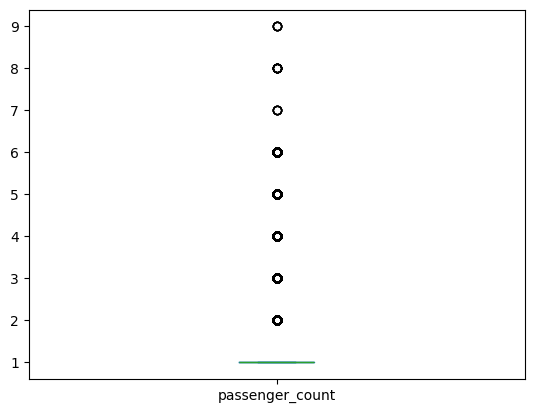

In [130]:
# passenger_count

Q1 = df['passenger_count'].quantile(0.25)
Q3 = df['passenger_count'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['passenger_count'] < lower_bound) | (df['passenger_count'] > upper_bound)]
outlier_count = outliers.shape[0]

print(f"Number of outliers: {outlier_count}")

df['passenger_count'].plot(kind='box', vert=True)
plt.show()

Number of outliers: 245971


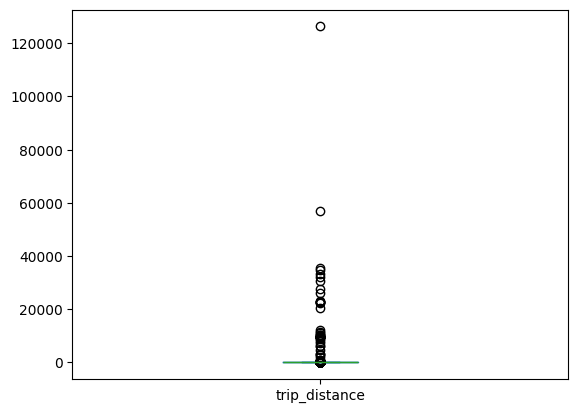

In [132]:
# trip_distance

Q1 = df['trip_distance'].quantile(0.25)
Q3 = df['trip_distance'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['trip_distance'] < lower_bound) | (df['trip_distance'] > upper_bound)]
outlier_count = outliers.shape[0]

print(f"Number of outliers: {outlier_count}")

df['trip_distance'].plot(kind='box', vert=True)
plt.show()

Number of outliers: 101088


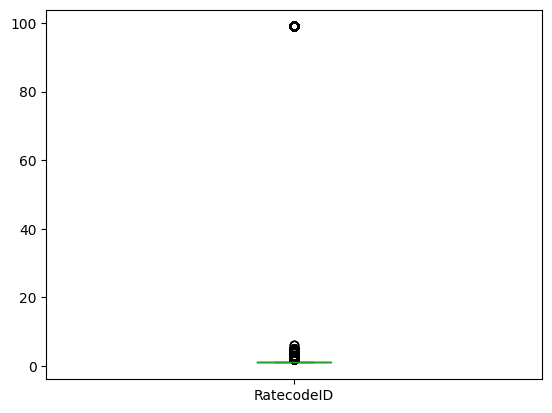

In [134]:
# RatecodeID

Q1 = df['RatecodeID'].quantile(0.25)
Q3 = df['RatecodeID'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['RatecodeID'] < lower_bound) | (df['RatecodeID'] > upper_bound)]
outlier_count = outliers.shape[0]

print(f"Number of outliers: {outlier_count}")

df['RatecodeID'].plot(kind='box', vert=True)
plt.show()

Number of outliers: 0


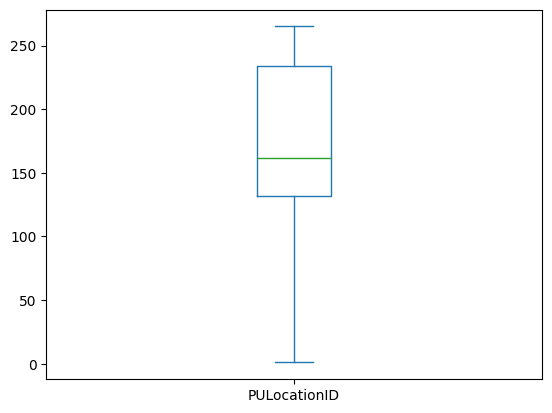

In [136]:
# PULocationID

Q1 = df['PULocationID'].quantile(0.25)
Q3 = df['PULocationID'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['PULocationID'] < lower_bound) | (df['PULocationID'] > upper_bound)]
outlier_count = outliers.shape[0]

print(f"Number of outliers: {outlier_count}")

df['PULocationID'].plot(kind='box', vert=True)
plt.show()

Number of outliers: 0


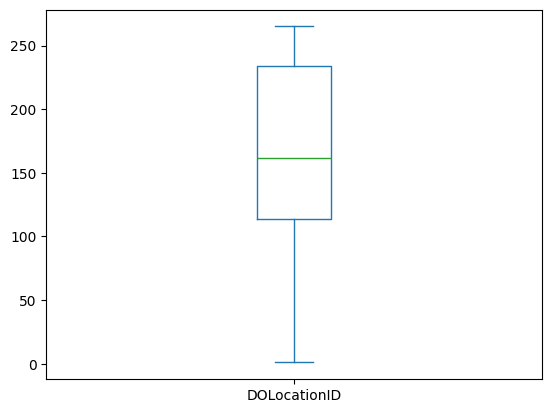

In [138]:
# DOLocationID

Q1 = df['DOLocationID'].quantile(0.25)
Q3 = df['DOLocationID'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['DOLocationID'] < lower_bound) | (df['DOLocationID'] > upper_bound)]
outlier_count = outliers.shape[0]

print(f"Number of outliers: {outlier_count}")

df['DOLocationID'].plot(kind='box', vert=True)
plt.show()

Number of outliers: 397361


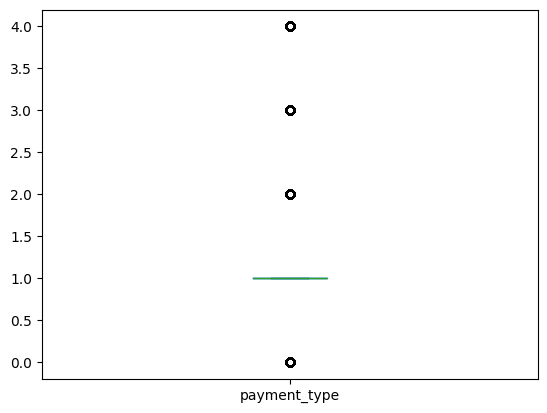

In [140]:
# payment_type

Q1 = df['payment_type'].quantile(0.25)
Q3 = df['payment_type'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['payment_type'] < lower_bound) | (df['payment_type'] > upper_bound)]
outlier_count = outliers.shape[0]

print(f"Number of outliers: {outlier_count}")

df['payment_type'].plot(kind='box', vert=True)
plt.show()

Number of outliers: 189812


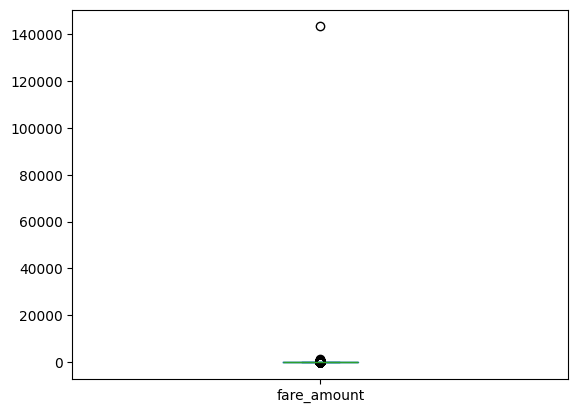

In [142]:
# fare_amount

Q1 = df['fare_amount'].quantile(0.25)
Q3 = df['fare_amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['fare_amount'] < lower_bound) | (df['fare_amount'] > upper_bound)]
outlier_count = outliers.shape[0]

print(f"Number of outliers: {outlier_count}")

df['fare_amount'].plot(kind='box', vert=True)
plt.show()

Number of outliers: 32941


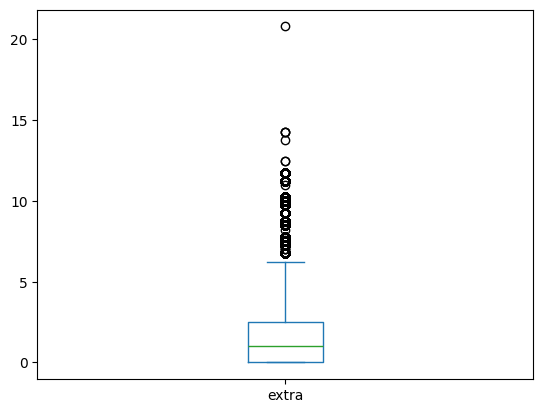

In [144]:
# extra

Q1 = df['extra'].quantile(0.25)
Q3 = df['extra'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['extra'] < lower_bound) | (df['extra'] > upper_bound)]
outlier_count = outliers.shape[0]

print(f"Number of outliers: {outlier_count}")

df['extra'].plot(kind='box', vert=True)
plt.show()

Number of outliers: 17557


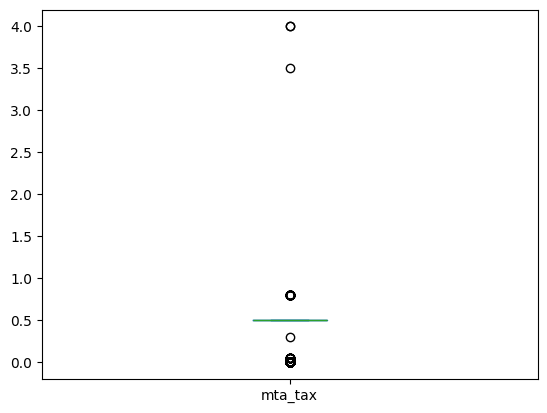

In [146]:
# mta_tax

Q1 = df['mta_tax'].quantile(0.25)
Q3 = df['mta_tax'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['mta_tax'] < lower_bound) | (df['mta_tax'] > upper_bound)]
outlier_count = outliers.shape[0]

print(f"Number of outliers: {outlier_count}")

df['mta_tax'].plot(kind='box', vert=True)
plt.show()

Number of outliers: 143307


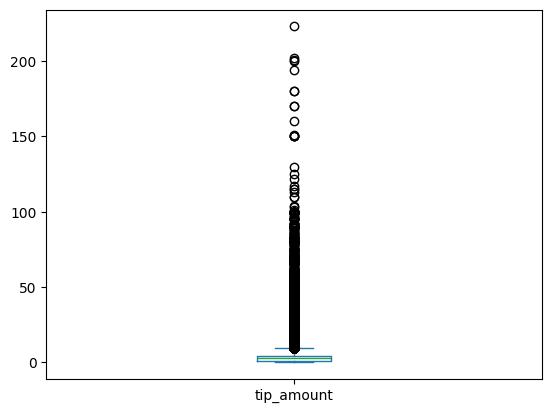

In [148]:
# tip_amount	

Q1 = df['tip_amount'].quantile(0.25)
Q3 = df['tip_amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['tip_amount'] < lower_bound) | (df['tip_amount'] > upper_bound)]
outlier_count = outliers.shape[0]

print(f"Number of outliers: {outlier_count}")

df['tip_amount'].plot(kind='box', vert=True)
plt.show()

Number of outliers: 152213


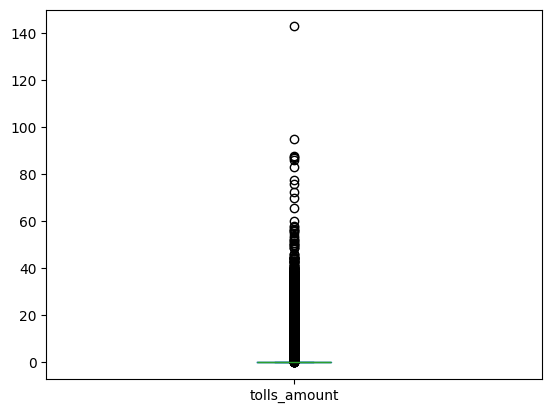

In [150]:
# tolls_amount	

Q1 = df['tolls_amount'].quantile(0.25)
Q3 = df['tolls_amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['tolls_amount'] < lower_bound) | (df['tolls_amount'] > upper_bound)]
outlier_count = outliers.shape[0]

print(f"Number of outliers: {outlier_count}")

df['tolls_amount'].plot(kind='box', vert=True)
plt.show()

Number of outliers: 2117


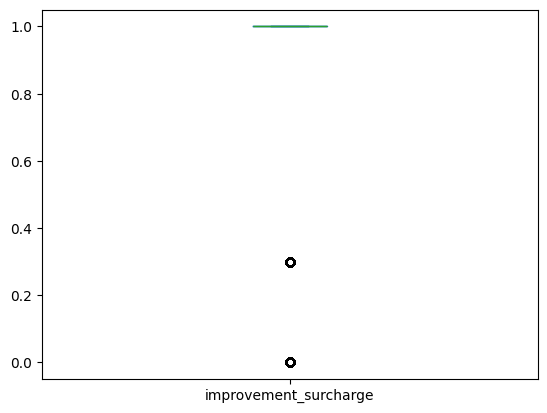

In [152]:
# improvement_surcharge	

Q1 = df['improvement_surcharge'].quantile(0.25)
Q3 = df['improvement_surcharge'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['improvement_surcharge'] < lower_bound) | (df['improvement_surcharge'] > upper_bound)]
outlier_count = outliers.shape[0]

print(f"Number of outliers: {outlier_count}")

df['improvement_surcharge'].plot(kind='box', vert=True)
plt.show()

Number of outliers: 215189


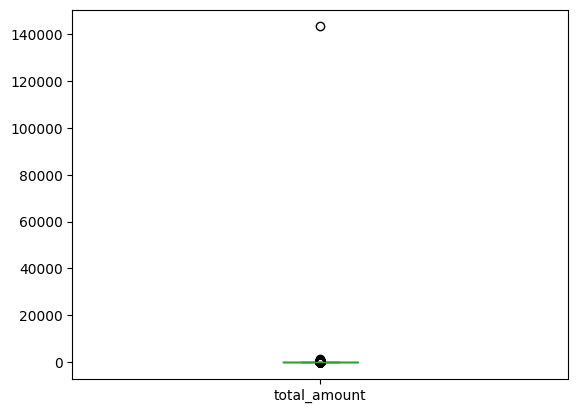

In [154]:
# total_amount	

Q1 = df['total_amount'].quantile(0.25)
Q3 = df['total_amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['total_amount'] < lower_bound) | (df['total_amount'] > upper_bound)]
outlier_count = outliers.shape[0]

print(f"Number of outliers: {outlier_count}")

df['total_amount'].plot(kind='box', vert=True)
plt.show()

Number of outliers: 203585


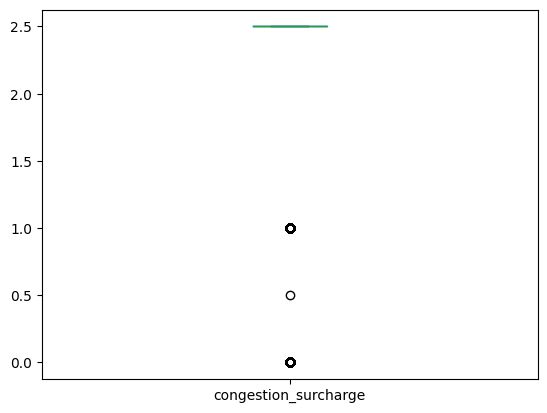

In [156]:
# congestion_surcharge	

Q1 = df['congestion_surcharge'].quantile(0.25)
Q3 = df['congestion_surcharge'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['congestion_surcharge'] < lower_bound) | (df['congestion_surcharge'] > upper_bound)]
outlier_count = outliers.shape[0]

print(f"Number of outliers: {outlier_count}")

df['congestion_surcharge'].plot(kind='box', vert=True)
plt.show()

Number of outliers: 224128


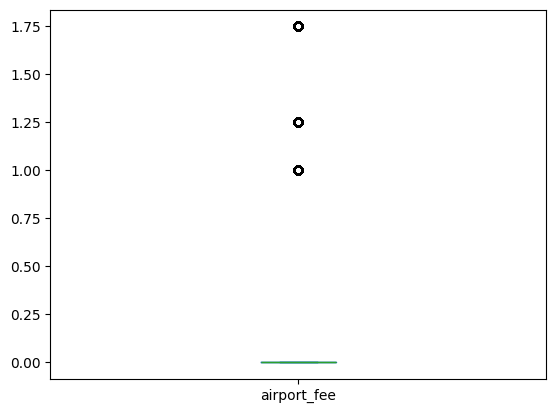

In [158]:
# airport_fee

Q1 = df['airport_fee'].quantile(0.25)
Q3 = df['airport_fee'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['airport_fee'] < lower_bound) | (df['airport_fee'] > upper_bound)]
outlier_count = outliers.shape[0]

print(f"Number of outliers: {outlier_count}")

df['airport_fee'].plot(kind='box', vert=True)
plt.show()

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [160]:
# remove passenger_count > 6
df = df[df['passenger_count']<=6]

In [162]:
# Continue with outlier handling

df = df[~((df['trip_distance'] < 0.1) & (df['fare_amount'] > 300))]
df = df[~((df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID']))]
df = df[df['trip_distance'] <= 250]
df = df[df['payment_type'] != 0]
df.reset_index(drop=True, inplace=True)
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-12-01 00:27:51,2023-12-01 00:50:12,1.0,3.99,1.0,148,50,1,23.3,1.0,0.5,5.66,0.0,1.0,33.96,2.5,0.0
1,2,2023-12-01 00:06:19,2023-12-01 00:16:57,1.0,1.05,1.0,161,161,1,10.7,1.0,0.5,3.14,0.0,1.0,18.84,2.5,0.0
2,2,2023-12-01 00:16:07,2023-12-01 00:19:17,1.0,0.40,1.0,68,68,1,5.1,1.0,0.5,0.00,0.0,1.0,10.10,2.5,0.0
3,2,2023-12-01 00:57:08,2023-12-01 01:05:49,1.0,1.66,1.0,114,186,1,10.7,1.0,0.5,3.14,0.0,1.0,18.84,2.5,0.0
4,2,2023-12-01 00:46:28,2023-12-01 00:59:29,2.0,2.45,1.0,164,232,1,14.9,1.0,0.5,1.00,0.0,1.0,20.90,2.5,0.0


In [ ]:
# Do any columns need standardising?



## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [164]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

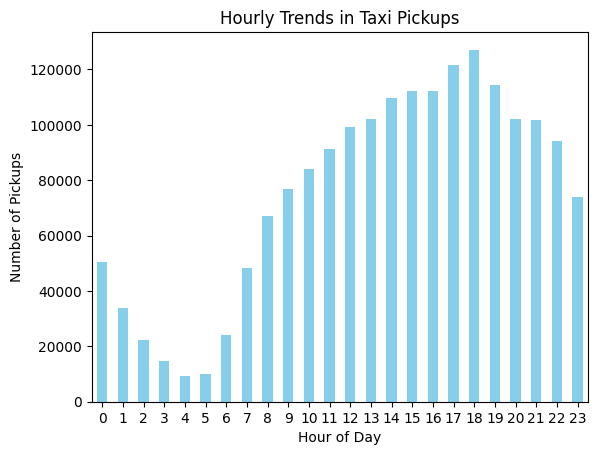

In [170]:
# Find and show the hourly trends in taxi pickups

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
hourly_trends = df.groupby('pickup_hour').size()

hourly_trends.plot(kind='bar', color='skyblue')
plt.title('Hourly Trends in Taxi Pickups')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=0)
plt.show()

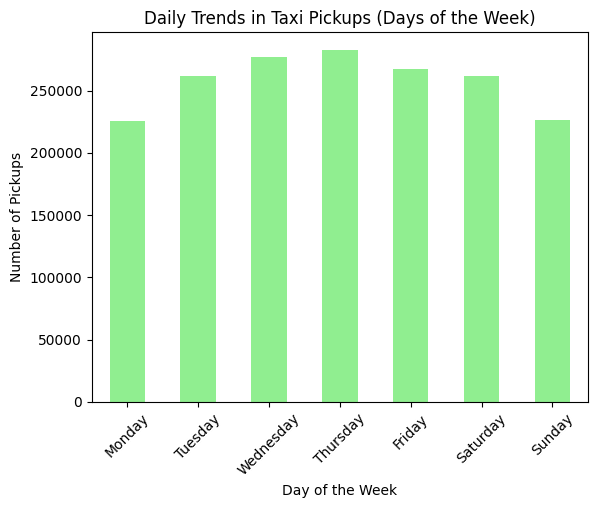

In [172]:
# Find and show the daily trends in taxi pickups (days of the week)
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')
df['pickup_day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek
daily_trends = df.groupby('pickup_day_of_week').size()

days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

daily_trends = daily_trends.reindex(range(7))  # Ensure all days are accounted for even if some days have no pickups
daily_trends.index = days_of_week  # Rename index to actual day names
daily_trends.plot(kind='bar', color='lightgreen')
plt.title('Daily Trends in Taxi Pickups (Days of the Week)')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=45)
plt.show()

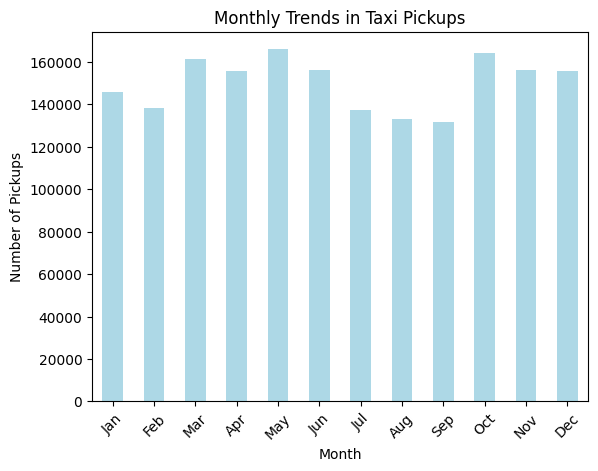

In [174]:
# Show the monthly trends in pickups

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month
monthly_trends = df.groupby('pickup_month').size()

monthly_trends.plot(kind='bar', color='lightblue')
plt.title('Monthly Trends in Taxi Pickups')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [176]:
# Analyse the above parameters

financial_columns = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']
negative_or_zero_values = {}

for column in financial_columns:
    negative_or_zero_values[column] = df[df[column] <= 0][column].count()

print("Count of zero/negative values in financial parameters:")
for column, count in negative_or_zero_values.items():
    print(f"{column}: {count} rows")

issue_rows_fare = df[df['fare_amount'] <= 0]

issue_rows_fare[['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']].head()

Count of zero/negative values in financial parameters:
fare_amount: 465 rows
tip_amount: 402327 rows
total_amount: 240 rows
trip_distance: 22022 rows


,fare_amount,tip_amount,total_amount,trip_distance
21545,0.0,0.0,1.0,0.3
21701,0.0,0.0,0.0,0.0
22497,0.0,0.0,3.5,1.5
24704,0.0,0.0,0.0,1.6
33923,0.0,0.0,0.0,0.0


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [178]:
# Create a df with non zero entries for the selected parameters.

df_filtered = df[(df['fare_amount'] > 0) & (df['tip_amount'] >= 0) & (df['total_amount'] > 0)]
df_filtered = df_filtered[(df_filtered['trip_distance'] > 0) | (df_filtered['PULocationID'] == df_filtered['DOLocationID'])]


df_filtered.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,pickup_hour,pickup_day_of_week,pickup_month
0,2,2023-12-01 00:27:51,2023-12-01 00:50:12,1.0,3.99,1.0,148,50,1,23.3,...,0.5,5.66,0.0,1.0,33.96,2.5,0.0,0,4,12
1,2,2023-12-01 00:06:19,2023-12-01 00:16:57,1.0,1.05,1.0,161,161,1,10.7,...,0.5,3.14,0.0,1.0,18.84,2.5,0.0,0,4,12
2,2,2023-12-01 00:16:07,2023-12-01 00:19:17,1.0,0.40,1.0,68,68,1,5.1,...,0.5,0.00,0.0,1.0,10.10,2.5,0.0,0,4,12
3,2,2023-12-01 00:57:08,2023-12-01 01:05:49,1.0,1.66,1.0,114,186,1,10.7,...,0.5,3.14,0.0,1.0,18.84,2.5,0.0,0,4,12
4,2,2023-12-01 00:46:28,2023-12-01 00:59:29,2.0,2.45,1.0,164,232,1,14.9,...,0.5,1.00,0.0,1.0,20.90,2.5,0.0,0,4,12


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

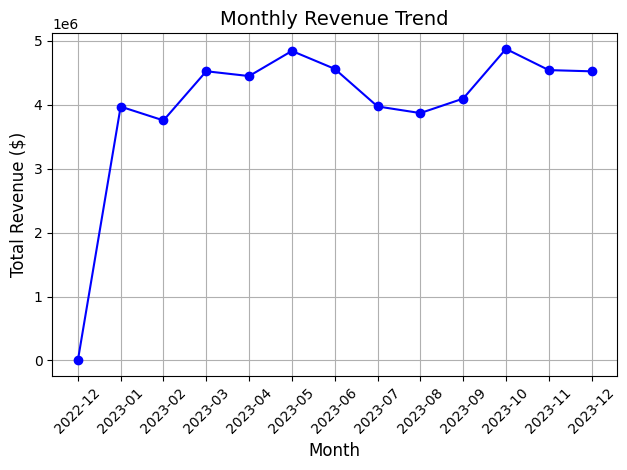

In [180]:
# Group data by month and analyse monthly revenue

df_filtered['tpep_pickup_datetime'] = pd.to_datetime(df_filtered['tpep_pickup_datetime'])
df_filtered['year_month'] = df_filtered['tpep_pickup_datetime'].dt.to_period('M')

monthly_revenue = df_filtered.groupby('year_month')['total_amount'].sum().reset_index()

plt.plot(monthly_revenue['year_month'].astype(str), monthly_revenue['total_amount'], marker='o', color='b')
plt.xticks(rotation=45)
plt.title('Monthly Revenue Trend', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [182]:
# Calculate proportion of each quarter

df_filtered['quarter'] = df_filtered['tpep_pickup_datetime'].dt.to_period('Q')
quarterly_revenue = df_filtered.groupby('quarter')['total_amount'].sum().reset_index()
total_yearly_revenue = quarterly_revenue['total_amount'].sum()

quarterly_revenue['proportion'] = quarterly_revenue['total_amount'] / total_yearly_revenue

quarterly_revenue.head()

,quarter,total_amount,proportion
0,2022Q4,13.50,2.596146e-07
1,2023Q1,12254747.66,2.356675e-01
2,2023Q2,13857173.80,2.664833e-01
3,2023Q3,11944429.45,2.296998e-01
4,2023Q4,13943802.75,2.681492e-01


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

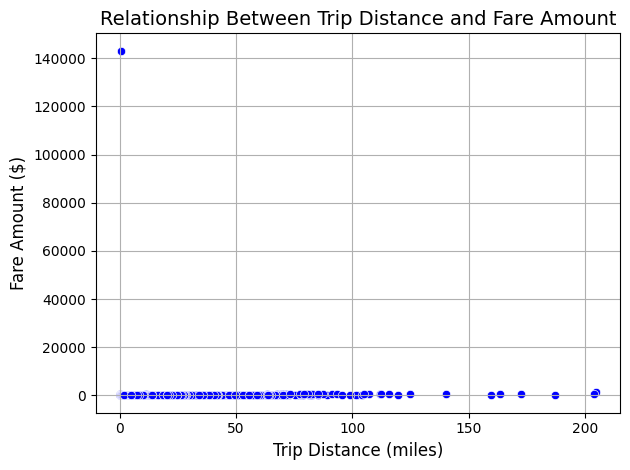

################ correlation - 0.1554700745155099 ################


In [184]:
# Show how trip fare is affected by distance

df_filtered_non_zero_distance = df_filtered[df_filtered['trip_distance'] > 0]

sns.scatterplot(data=df_filtered_non_zero_distance, x='trip_distance', y='fare_amount', color='b')
plt.title('Relationship Between Trip Distance and Fare Amount', fontsize=14)
plt.xlabel('Trip Distance (miles)', fontsize=12)
plt.ylabel('Fare Amount ($)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

correlation = df_filtered_non_zero_distance['trip_distance'].corr(df_filtered_non_zero_distance['fare_amount'])
print('################ correlation -',correlation, '################')

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

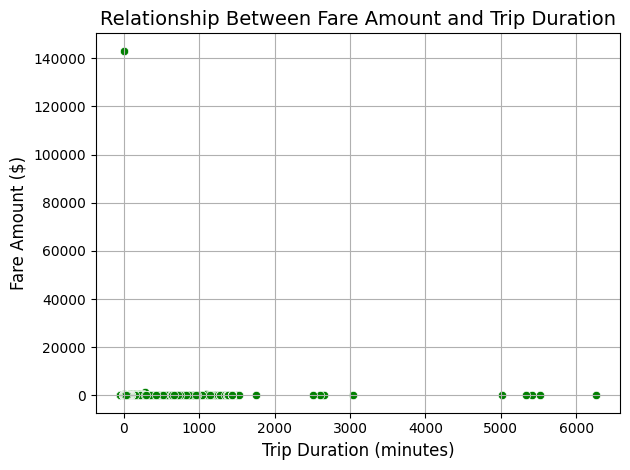

################ correlation - 0.1554700745155099 ################


In [186]:
# Show relationship between fare and trip duration

df_filtered['tpep_pickup_datetime'] = pd.to_datetime(df_filtered['tpep_pickup_datetime'])
df_filtered['tpep_dropoff_datetime'] = pd.to_datetime(df_filtered['tpep_dropoff_datetime'])

df_filtered['trip_duration'] = (df_filtered['tpep_dropoff_datetime'] - df_filtered['tpep_pickup_datetime']).dt.total_seconds() / 60

sns.scatterplot(data=df_filtered, x='trip_duration', y='fare_amount', color='g')
plt.title('Relationship Between Fare Amount and Trip Duration', fontsize=14)
plt.xlabel('Trip Duration (minutes)', fontsize=12)
plt.ylabel('Fare Amount ($)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

correlation_fare_trip_duration = df_filtered['fare_amount'].corr(df_filtered['trip_duration'])
print('################ correlation -',correlation, '################')

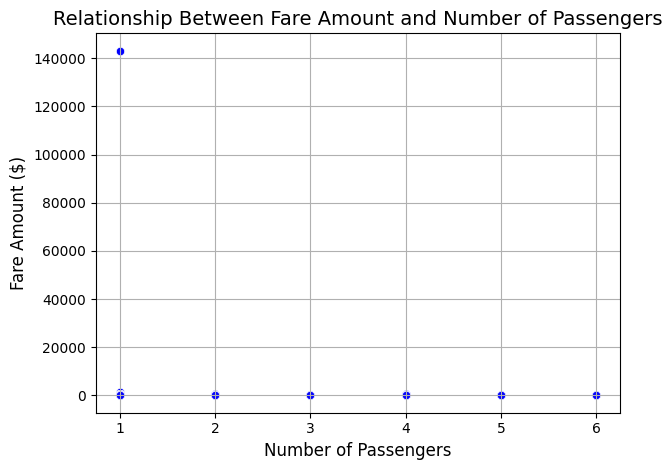

################ correlation - 0.1554700745155099 ################


In [188]:
# Show relationship between fare and number of passengers

sns.scatterplot(data=df_filtered, x='passenger_count', y='fare_amount', color='b')
plt.title('Relationship Between Fare Amount and Number of Passengers', fontsize=14)
plt.xlabel('Number of Passengers', fontsize=12)
plt.ylabel('Fare Amount ($)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


correlation_fare_passenger_count = df_filtered['fare_amount'].corr(df_filtered['passenger_count'])
print('################ correlation -',correlation, '################')

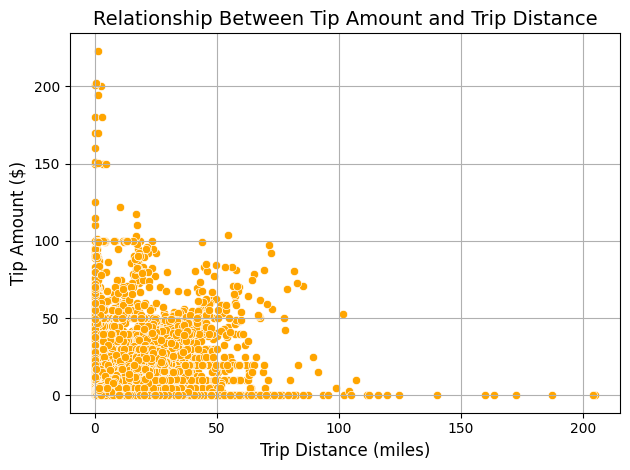

################ correlation - 0.1554700745155099 ################


In [190]:
# Show relationship between tip and trip distance

sns.scatterplot(data=df_filtered, x='trip_distance', y='tip_amount', color='orange')
plt.title('Relationship Between Tip Amount and Trip Distance', fontsize=14)
plt.xlabel('Trip Distance (miles)', fontsize=12)
plt.ylabel('Tip Amount ($)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

correlation_tip_distance = df_filtered['tip_amount'].corr(df_filtered['trip_distance'])
print('################ correlation -',correlation, '################')

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

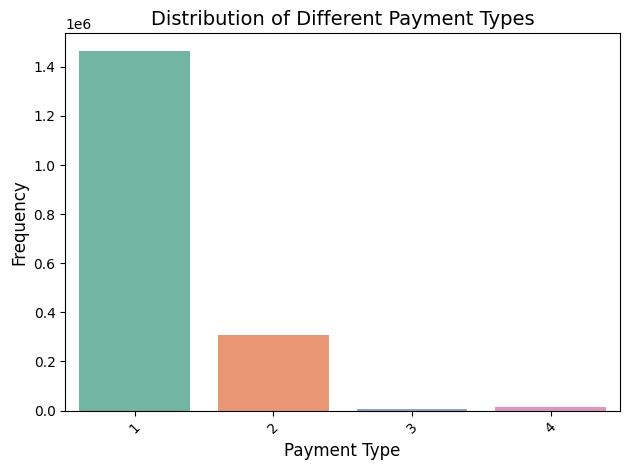

Percentage distribution of payment types:
 payment_type
1    81.584094
2    17.235133
4     0.737377
3     0.443396
Name: proportion, dtype: float64


In [192]:
# Analyse the distribution of different payment types (payment_type).


payment_type_counts = df_filtered['payment_type'].value_counts()

sns.barplot(x=payment_type_counts.index, y=payment_type_counts.values, palette='Set2')
plt.title('Distribution of Different Payment Types', fontsize=14)
plt.xlabel('Payment Type', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

payment_type_percentage = df_filtered['payment_type'].value_counts(normalize=True) * 100
print("Percentage distribution of payment types:\n", payment_type_percentage)

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [194]:
!pip install geopandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 3.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 3.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 3.8 MB/s eta 0:00:00a 0:00:01


**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [196]:
import geopandas as gpd


# Read the shapefile using geopandas
path = "/Users/dewangshishodia/Downloads/Starter Notebook - EDA NYC Taxi/Datasets and Dictionary/taxi_zones/taxi_zones.shp"
zones = gpd.read_file(path)
zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

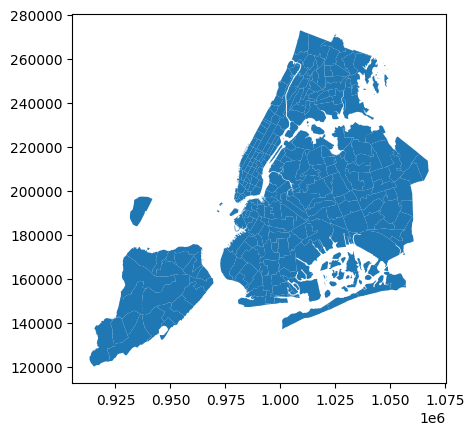

In [198]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [200]:
# Merge zones and trip records using locationID and PULocationID

merged_data = df.merge(zones, left_on='PULocationID', right_on='LocationID', how='left')

In [202]:
merged_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,pickup_hour,pickup_day_of_week,pickup_month,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,2,2023-12-01 00:27:51,2023-12-01 00:50:12,1.0,3.99,1.0,148,50,1,23.3,...,0,4,12,148.0,0.039131,0.000070,Lower East Side,148.0,Manhattan,"POLYGON ((988552.836 201677.665, 988387.669 20..."
1,2,2023-12-01 00:06:19,2023-12-01 00:16:57,1.0,1.05,1.0,161,161,1,10.7,...,0,4,12,161.0,0.035804,0.000072,Midtown Center,161.0,Manhattan,"POLYGON ((991081.026 214453.698, 990952.644 21..."
2,2,2023-12-01 00:16:07,2023-12-01 00:19:17,1.0,0.40,1.0,68,68,1,5.1,...,0,4,12,68.0,0.049337,0.000111,East Chelsea,68.0,Manhattan,"POLYGON ((983690.405 209040.369, 983550.612 20..."
3,2,2023-12-01 00:57:08,2023-12-01 01:05:49,1.0,1.66,1.0,114,186,1,10.7,...,0,4,12,114.0,0.031727,0.000047,Greenwich Village South,114.0,Manhattan,"POLYGON ((986306.712 203122.786, 986300.242 20..."
4,2,2023-12-01 00:46:28,2023-12-01 00:59:29,2.0,2.45,1.0,164,232,1,14.9,...,0,4,12,164.0,0.035772,0.000056,Midtown South,164.0,Manhattan,"POLYGON ((988787.425 210315.593, 988662.868 21..."


In [204]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1801763 entries, 0 to 1801762
Data columns (total 28 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  object        
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  airport_fee            float64       
 18  pickup_hour           

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [220]:
# Group data by location and calculate the number of trips

trip_counts = merged_data.groupby('PULocationID').size().reset_index(name='total_trips')
trip_counts.head()

,PULocationID,total_trips
0,1,209
1,2,2
2,3,40
3,4,1822
4,5,13


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

<Axes: >

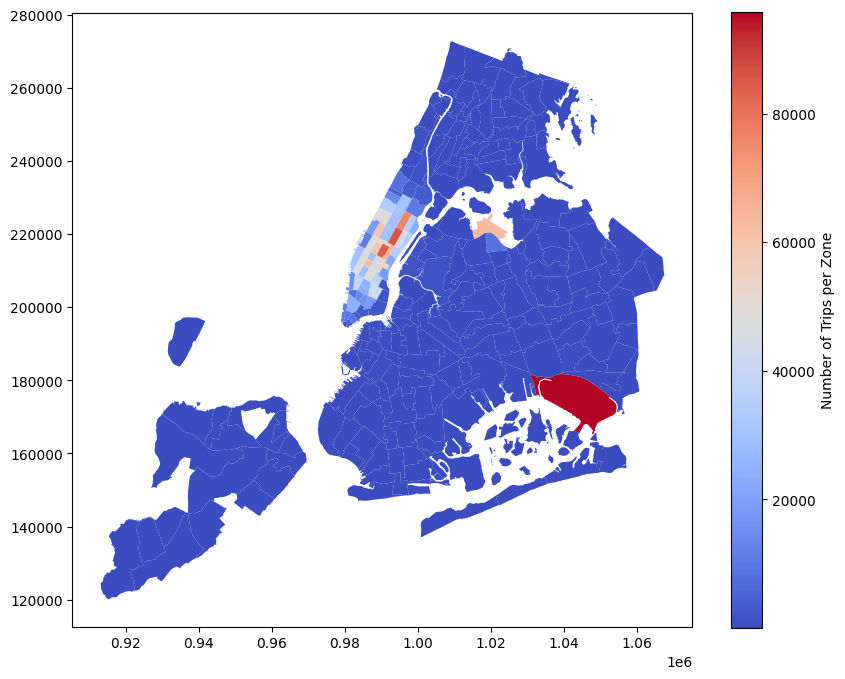

In [226]:
# Merge trip counts back to the zones GeoDataFrame


zones_with_trip_counts = zones.merge(trip_counts, left_on='LocationID', right_on='PULocationID', how='left')
zones_with_trip_counts.plot(column='total_trips', cmap='coolwarm', legend=True, figsize=(10, 8),legend_kwds={'label': "Number of Trips per Zone"})

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

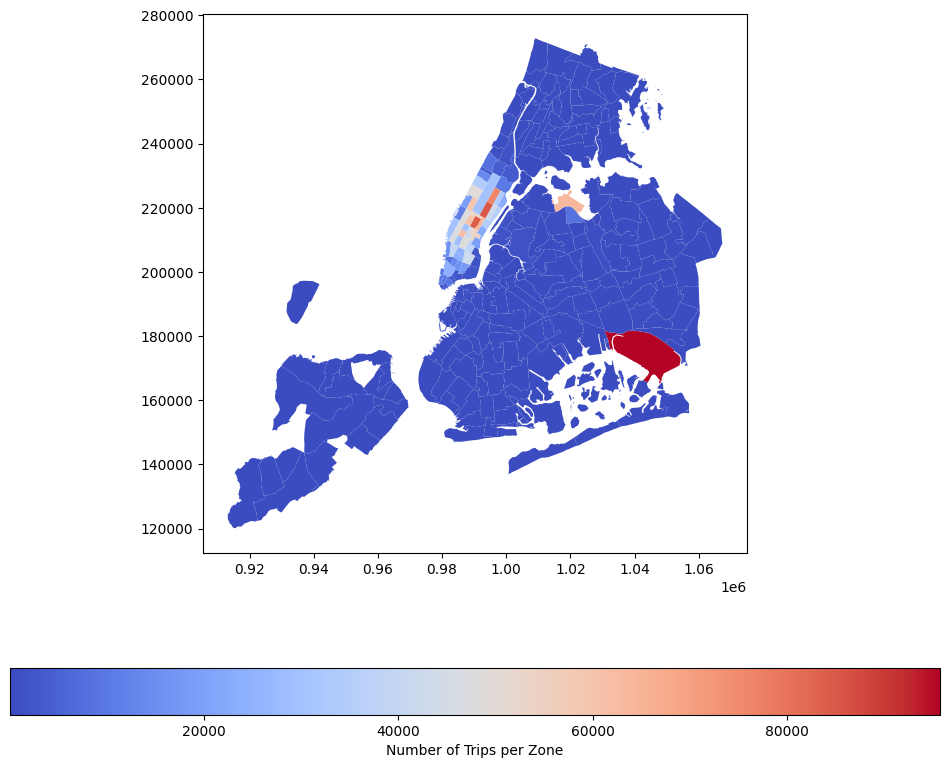

In [228]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot the map and display it
zones_with_trip_counts.plot(column='total_trips', ax=ax, legend=True, cmap='coolwarm', legend_kwds={'label': "Number of Trips per Zone", 'orientation': 'horizontal'})

plt.show()

In [230]:
# can you try displaying the zones DF sorted by the number of trips?

sorted_zones = zones_with_trip_counts.sort_values(by='total_trips', ascending=False)
sorted_zones[['zone', 'total_trips']].head()

,zone,total_trips
131,JFK Airport,95778.0
236,Upper East Side South,85419.0
160,Midtown Center,84513.0
235,Upper East Side North,76089.0
161,Midtown East,64588.0


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [232]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'airport_fee', 'pickup_hour',
       'pickup_day_of_week', 'pickup_month'],
      dtype='object')

In [234]:
# Find routes which have the slowest speeds at different times of the day

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds()
filtered_data = df[df['PULocationID'] != df['DOLocationID']]
filtered_data['speed'] = filtered_data['trip_distance'] / (filtered_data['trip_duration'] / 3600)  # Speed in miles per hour

route_speeds = filtered_data.groupby(['pickup_hour', 'PULocationID', 'DOLocationID']).agg(avg_speed=('speed', 'mean')).reset_index()

slow_routes = route_speeds.sort_values(by='avg_speed', ascending=True)
slow_routes.head(10)

,pickup_hour,PULocationID,DOLocationID,avg_speed
6937,1,114,120,-49.195021
59073,12,244,126,-18.504673
51969,11,213,32,-13.514077
8003,1,151,107,-8.327645
6932,1,114,106,-4.899083
5904,1,50,129,-2.479968
8786,1,198,36,-1.939163
86450,17,141,51,0.000000
11532,2,129,223,0.000000
56013,12,137,117,0.000000


How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

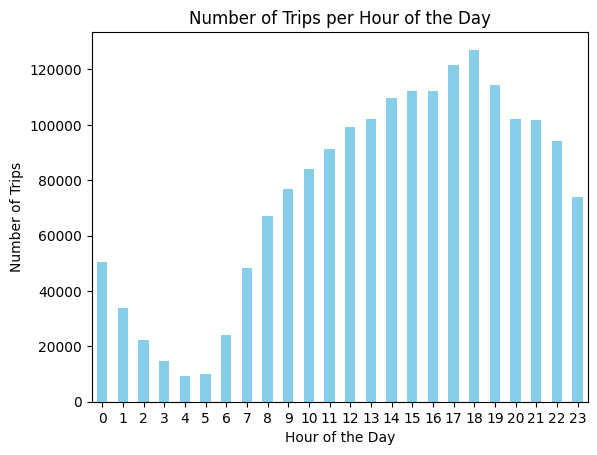

The busiest hour is 18 with 127116 trips.


In [236]:
# Visualise the number of trips per hour and find the busiest hour

df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
trips_per_hour = df.groupby('pickup_hour').size()

trips_per_hour.plot(kind='bar', color='skyblue')
plt.title('Number of Trips per Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.xticks(rotation=0)
plt.show()

busiest_hour = trips_per_hour.idxmax()
busiest_hour_count = trips_per_hour.max()

print(f"The busiest hour is {busiest_hour} with {busiest_hour_count} trips.")

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [240]:
# Scale up the number of trips
sample_fraction = 0.05
actual_trips_per_hour = trips_per_hour * (1 / sample_fraction)

# Fill in the value of your sampling fraction and use that to scale up the numbers
busiest_hours = actual_trips_per_hour.nlargest(5)
busiest_hours

pickup_hour
18    2542320.0
17    2429780.0
19    2283980.0
16    2245220.0
15    2243580.0
dtype: float64

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

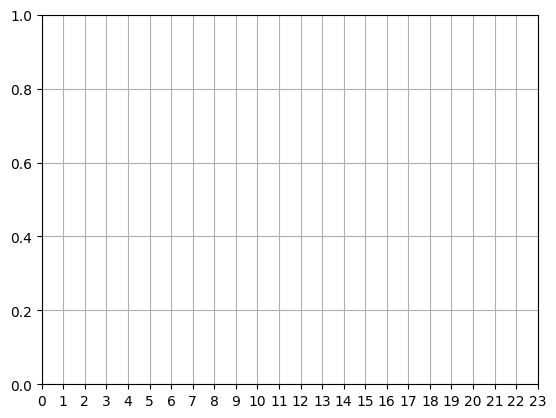

In [242]:
# Compare traffic trends for the week days and weekends

df['pickup_day'] = df['tpep_pickup_datetime'].dt.day_name()  # Get the day name from datetime
df['day_type'] = df['pickup_day'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
hourly_traffic = df.groupby(['day_type', 'pickup_hour']).size().unstack(fill_value=0)

hourly_traffic.T.plot(kind='line', ax=ax, marker='o', linewidth=2)
ax.set_title('Hourly Traffic Pattern Comparison: Weekdays vs Weekends')
ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Number of Trips')
ax.legend(title="Day Type", labels=['Weekdays', 'Weekends'])

plt.grid(True)
plt.xticks(range(0, 24))
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

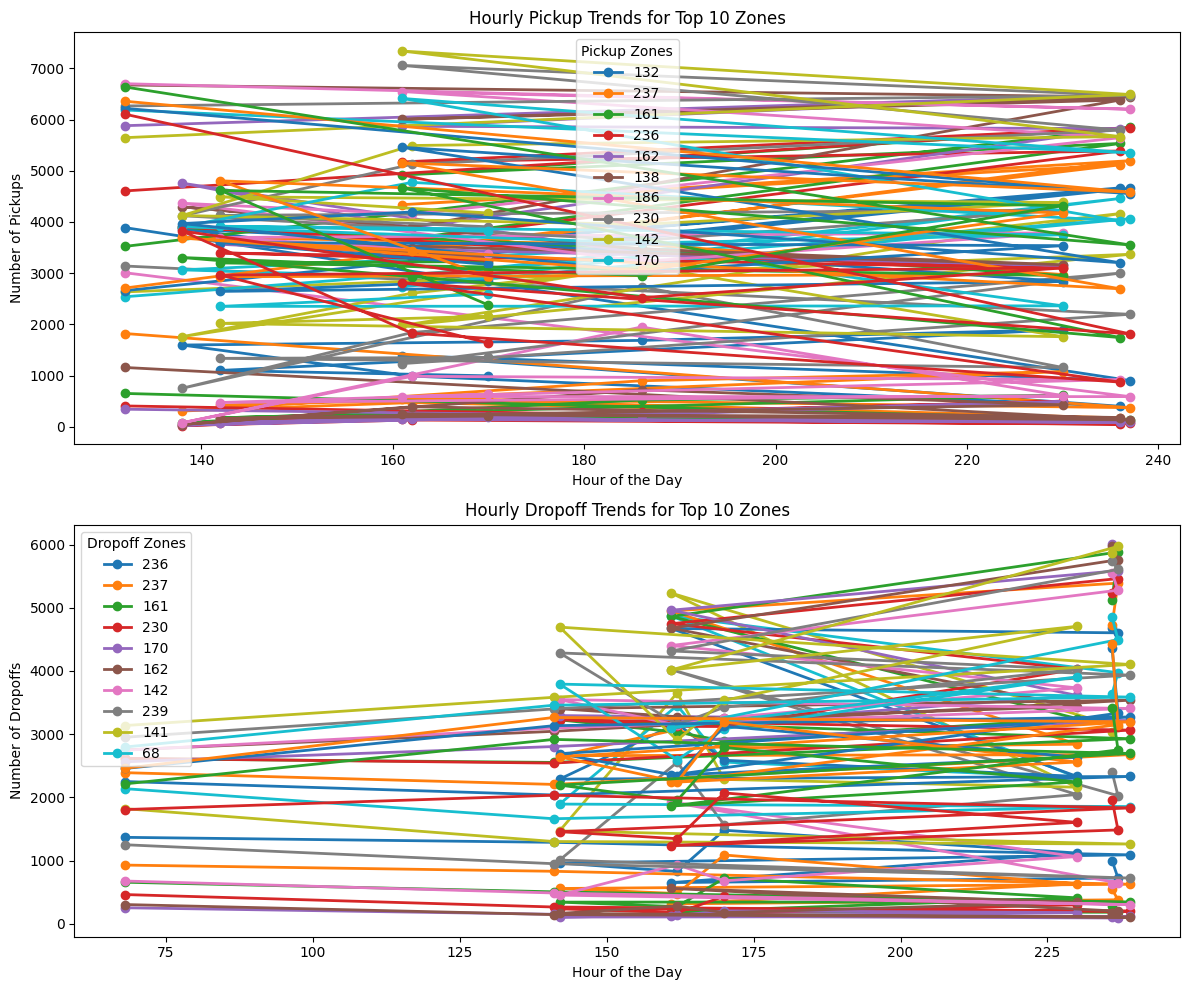

In [244]:
# Find top 10 pickup and dropoff zones

pickup_counts = df.groupby(['pickup_hour', 'PULocationID']).size().unstack(fill_value=0)
dropoff_counts = df.groupby(['pickup_hour', 'DOLocationID']).size().unstack(fill_value=0)
top_10_pickup_zones = pickup_counts.sum(axis=0).sort_values(ascending=False).head(10)
top_10_dropoff_zones = dropoff_counts.sum(axis=0).sort_values(ascending=False).head(10)

fig, axes = plt.subplots(2, 1, figsize=(12, 10))

pickup_counts[top_10_pickup_zones.index].T.plot(kind='line', ax=axes[0], marker='o', linewidth=2)
axes[0].set_title('Hourly Pickup Trends for Top 10 Zones')
axes[0].set_xlabel('Hour of the Day')
axes[0].set_ylabel('Number of Pickups')
axes[0].legend(title="Pickup Zones", labels=top_10_pickup_zones.index)

dropoff_counts[top_10_dropoff_zones.index].T.plot(kind='line', ax=axes[1], marker='o', linewidth=2)
axes[1].set_title('Hourly Dropoff Trends for Top 10 Zones')
axes[1].set_xlabel('Hour of the Day')
axes[1].set_ylabel('Number of Dropoffs')
axes[1].legend(title="Dropoff Zones", labels=top_10_dropoff_zones.index)

plt.tight_layout()
plt.show()

In [246]:
pickup_counts = df.groupby(['pickup_hour', 'PULocationID']).size().unstack(fill_value=0)
dropoff_counts = df.groupby(['pickup_hour', 'DOLocationID']).size().unstack(fill_value=0)
top_10_pickup_zones = pickup_counts.sum(axis=0).sort_values(ascending=False).head(10)
top_10_dropoff_zones = dropoff_counts.sum(axis=0).sort_values(ascending=False).head(10)

top_10_pickup_zones_df = pd.DataFrame(top_10_pickup_zones).reset_index()
top_10_pickup_zones_df.columns = ['PULocationID', 'Total_Pickups']

top_10_dropoff_zones_df = pd.DataFrame(top_10_dropoff_zones).reset_index()
top_10_dropoff_zones_df.columns = ['DOLocationID', 'Total_Dropoffs']

print("Top 10 Pickup Zones:")
print(top_10_pickup_zones_df)

print("\nTop 10 Dropoff Zones:")
print(top_10_dropoff_zones_df)

Top 10 Pickup Zones:
   PULocationID  Total_Pickups
0           132          95778
1           237          85419
2           161          84513
3           236          76089
4           162          64588
5           138          63486
6           186          62333
7           230          60382
8           142          59812
9           170          53623

Top 10 Dropoff Zones:
   DOLocationID  Total_Dropoffs
0           236           79894
1           237           76190
2           161           70416
3           230           55479
4           170           53498
5           162           51345
6           142           50601
7           239           50405
8           141           47665
9            68           45617


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [248]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
# Find the top 10 and bottom 10 pickup/dropoff ratios

pickup_counts_total = pickup_counts.sum(axis=0)  # Sum up total pickups for each zone
dropoff_counts_total = dropoff_counts.sum(axis=0)  # Sum up total dropoffs for each zone
pickup_dropoff_ratio = pickup_counts_total / dropoff_counts_total

top_10_pickup_dropoff_ratio = pickup_dropoff_ratio.sort_values(ascending=False).head(10)
bottom_10_pickup_dropoff_ratio = pickup_dropoff_ratio.sort_values(ascending=True).head(10)

top_10_pickup_dropoff_ratio_df = pd.DataFrame(top_10_pickup_dropoff_ratio).reset_index()
top_10_pickup_dropoff_ratio_df.columns = ['LocationID', 'Pickup_to_Dropoff_Ratio']

bottom_10_pickup_dropoff_ratio_df = pd.DataFrame(bottom_10_pickup_dropoff_ratio).reset_index()
bottom_10_pickup_dropoff_ratio_df.columns = ['LocationID', 'Pickup_to_Dropoff_Ratio']

print("Top 10 Pickup/Dropoff Ratios:")
print(top_10_pickup_dropoff_ratio_df)

print("\nBottom 10 Pickup/Dropoff Ratios:")
print(bottom_10_pickup_dropoff_ratio_df)


Top 10 Pickup/Dropoff Ratios:
   LocationID  Pickup_to_Dropoff_Ratio
0          70                 8.366768
1         132                 4.636364
2         138                 2.894938
3         186                 1.580131
4         114                 1.378142
5          43                 1.370762
6         249                 1.326762
7         162                 1.257922
8         161                 1.200196
9         100                 1.195903

Bottom 10 Pickup/Dropoff Ratios:
   LocationID  Pickup_to_Dropoff_Ratio
0          27                 0.026316
1         221                 0.031250
2         109                 0.038462
3         257                 0.038564
4           1                 0.039658
5         115                 0.043478
6         112                 0.050409
7         198                 0.053664
8         111                 0.055556
9         128                 0.057143


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [250]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
night_hours_df = df[(df['pickup_hour'] >= 23) | (df['pickup_hour'] <= 5)]

night_pickup_counts = night_hours_df.groupby('PULocationID').size()  # Count pickups for night hours
night_dropoff_counts = night_hours_df.groupby('DOLocationID').size()  # Count dropoffs for night hours

top_10_night_pickups = night_pickup_counts.sort_values(ascending=False).head(10)
top_10_night_dropoffs = night_dropoff_counts.sort_values(ascending=False).head(10)

top_10_night_pickups_df = pd.DataFrame(top_10_night_pickups).reset_index()
top_10_night_pickups_df.columns = ['LocationID', 'Night_Pickups']

top_10_night_dropoffs_df = pd.DataFrame(top_10_night_dropoffs).reset_index()
top_10_night_dropoffs_df.columns = ['LocationID', 'Night_Dropoffs']

print("Top 10 Pickup Zones during Night Hours (11PM - 5AM):")
print(top_10_night_pickups_df)

print("\nTop 10 Dropoff Zones during Night Hours (11PM - 5AM):")
print(top_10_night_dropoffs_df)

Top 10 Pickup Zones during Night Hours (11PM - 5AM):
   LocationID  Night_Pickups
0          79          15315
1         132          14387
2         249          12303
3          48          10367
4         148           9507
5         114           8641
6         230           8123
7         186           6874
8         164           6068
9          68           5977

Top 10 Dropoff Zones during Night Hours (11PM - 5AM):
   LocationID  Night_Dropoffs
0          79            8199
1          48            6801
2         170            6178
3          68            5784
4         107            5691
5         141            5223
6         263            4926
7         249            4874
8         230            4587
9         229            4323


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [252]:
# Filter for night hours (11 PM to 5 AM)

df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

nighttime_df = df[(df['pickup_hour'] >= 23) | (df['pickup_hour'] <= 5)]  # 11 PM - 5 AM
daytime_df = df[(df['pickup_hour'] >= 6) & (df['pickup_hour'] <= 22)]  # 6 AM - 10 PM

nighttime_revenue = nighttime_df['total_amount'].sum()
daytime_revenue = daytime_df['total_amount'].sum()

total_revenue = df['total_amount'].sum()

nighttime_revenue_share = (nighttime_revenue / total_revenue) * 100
daytime_revenue_share = (daytime_revenue / total_revenue) * 100

print(f"Nighttime Revenue Share: {nighttime_revenue_share:.2f}%")
print(f"Daytime Revenue Share: {daytime_revenue_share:.2f}%")

Nighttime Revenue Share: 12.10%
Daytime Revenue Share: 87.90%


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [254]:
# Analyse the fare per mile per passenger for different passenger counts

df['fare_per_mile'] = df['fare_amount'] / df['trip_distance']
df['fare_per_mile_per_passenger'] = df['fare_per_mile'] / df['passenger_count']
fare_per_passenger = df.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().reset_index()
print(fare_per_passenger)

   passenger_count  fare_per_mile_per_passenger
0              1.0                          inf
1              2.0                          inf
2              3.0                          inf
3              4.0                          inf
4              5.0                          inf
5              6.0                          inf


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [256]:
# Compare the average fare per mile for different days and for different times of the day

df['fare_per_mile'] = df['fare_amount'] / df['trip_distance']
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek
avg_fare_per_hour = df.groupby('pickup_hour')['fare_per_mile'].mean().reset_index()
avg_fare_per_day = df.groupby('day_of_week')['fare_per_mile'].mean().reset_index()

print("Average Fare per Mile by Hour of the Day:")
print(avg_fare_per_hour)

print("\nAverage Fare per Mile by Day of the Week:")
print(avg_fare_per_day)

Average Fare per Mile by Hour of the Day:
    pickup_hour  fare_per_mile
0             0            inf
1             1            inf
2             2            inf
3             3            inf
4             4            inf
5             5            inf
6             6            inf
7             7            inf
8             8            inf
9             9            inf
10           10            inf
11           11            inf
12           12            inf
13           13            inf
14           14            inf
15           15            inf
16           16            inf
17           17            inf
18           18            inf
19           19            inf
20           20            inf
21           21            inf
22           22            inf
23           23            inf

Average Fare per Mile by Day of the Week:
   day_of_week  fare_per_mile
0            0            inf
1            1            inf
2            2            inf
3            3      

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

    VendorID  pickup_hour  fare_per_mile
0          1            0            inf
1          1            1            inf
2          1            2            inf
3          1            3            inf
4          1            4            inf
5          1            5            inf
6          1            6            inf
7          1            7            inf
8          1            8            inf
9          1            9            inf
10         1           10            inf
11         1           11            inf
12         1           12            inf
13         1           13            inf
14         1           14            inf
15         1           15            inf
16         1           16            inf
17         1           17            inf
18         1           18            inf
19         1           19            inf
20         1           20            inf
21         1           21            inf
22         1           22            inf
23         1    

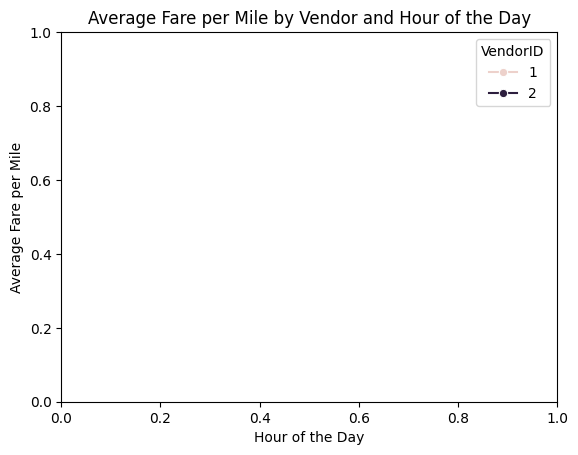

In [258]:
# Compare fare per mile for different vendors

df['fare_per_mile'] = df['fare_amount'] / df['trip_distance']
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
avg_fare_per_vendor_hour = df.groupby(['VendorID', 'pickup_hour'])['fare_per_mile'].mean().reset_index()

print(avg_fare_per_vendor_hour)

sns.lineplot(data=avg_fare_per_vendor_hour, x='pickup_hour', y='fare_per_mile', hue='VendorID', marker='o')
plt.title('Average Fare per Mile by Vendor and Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Fare per Mile')
plt.legend(title='VendorID')
plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [260]:
def categorize_distance(distance):
    if distance <= 2:
        return 'Up to 2 miles'
    elif 2 < distance <= 5:
        return '2 to 5 miles'
    else:
        return 'More than 5 miles'

   VendorID      distance_tier  fare_per_mile
0         1       2 to 5 miles       6.374142
1         1  More than 5 miles       4.418124
2         1      Up to 2 miles            inf
3         2       2 to 5 miles       6.549054
4         2  More than 5 miles       4.502819
5         2      Up to 2 miles            inf


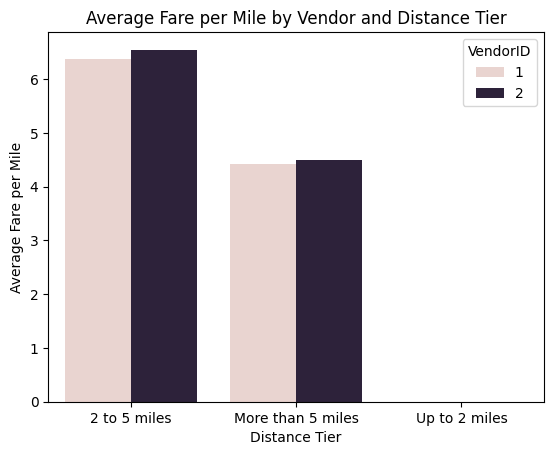

In [262]:
# Defining distance tiers

df['fare_per_mile'] = df['fare_amount'] / df['trip_distance']
df['distance_tier'] = df['trip_distance'].apply(categorize_distance)
avg_fare_per_tier_vendor = df.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().reset_index()

print(avg_fare_per_tier_vendor)

sns.barplot(data=avg_fare_per_tier_vendor, x='distance_tier', y='fare_per_mile', hue='VendorID')
plt.title('Average Fare per Mile by Vendor and Distance Tier')
plt.xlabel('Distance Tier')
plt.ylabel('Average Fare per Mile')
plt.legend(title='VendorID')
plt.show()

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

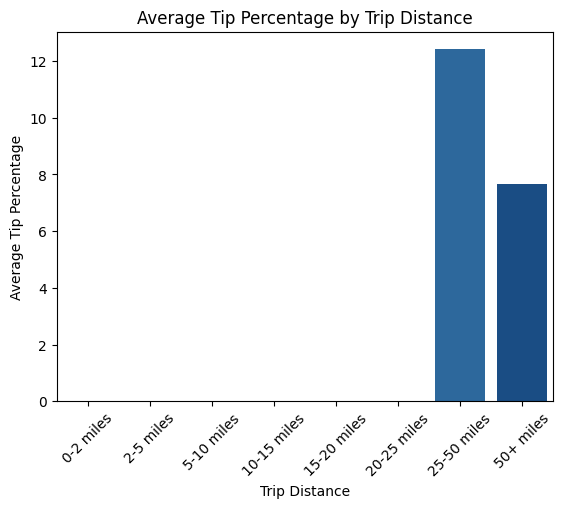

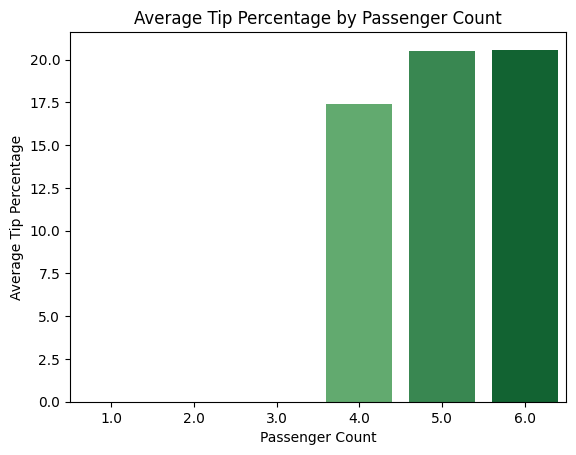

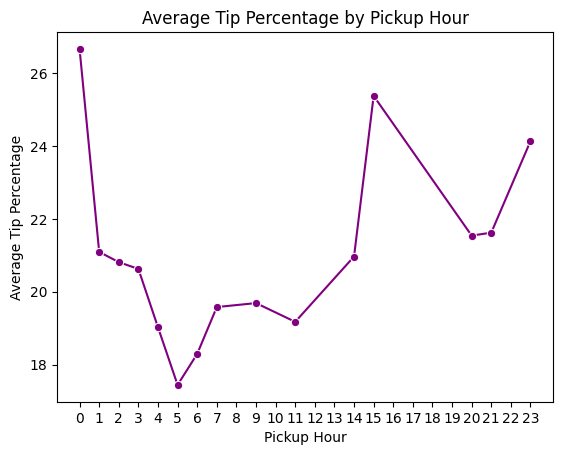

In [264]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

df['tip_percentage'] = (df['tip_amount'] / df['fare_amount']) * 100
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

bins = [0, 2, 5, 10, 15, 20, 25, 50, 100]
labels = ['0-2 miles', '2-5 miles', '5-10 miles', '10-15 miles', '15-20 miles', '20-25 miles', '25-50 miles', '50+ miles']
df['distance_group'] = pd.cut(df['trip_distance'], bins=bins, labels=labels, right=False)

avg_tip_distance = df.groupby('distance_group')['tip_percentage'].mean().reset_index()
avg_tip_passenger_count = df.groupby('passenger_count')['tip_percentage'].mean().reset_index()
avg_tip_hour = df.groupby('pickup_hour')['tip_percentage'].mean().reset_index()

sns.barplot(data=avg_tip_distance, x='distance_group', y='tip_percentage', palette='Blues')
plt.title('Average Tip Percentage by Trip Distance')
plt.xlabel('Trip Distance')
plt.ylabel('Average Tip Percentage')
plt.xticks(rotation=45)
plt.show()

sns.barplot(data=avg_tip_passenger_count, x='passenger_count', y='tip_percentage', palette='Greens')
plt.title('Average Tip Percentage by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Average Tip Percentage')
plt.show()

sns.lineplot(data=avg_tip_hour, x='pickup_hour', y='tip_percentage', marker='o', color='purple')
plt.title('Average Tip Percentage by Pickup Hour')
plt.xlabel('Pickup Hour')
plt.ylabel('Average Tip Percentage')
plt.xticks(range(0, 24))
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

Low Tip Group (Tip Percentage < 10%)
         fare_amount  trip_distance  passenger_count    pickup_hour
count  477341.000000  477341.000000    477341.000000  477341.000000
mean       22.061274       3.812973         1.433749      13.911057
min         0.010000       0.000000         1.000000       0.000000
25%         9.300000       1.000000         1.000000      10.000000
50%        14.200000       1.810000         1.000000      14.000000
75%        24.700000       3.900000         2.000000      18.000000
max    143163.450000     204.860000         6.000000      23.000000
std       208.297850       5.180308         0.914541       5.737490

High Tip Group (Tip Percentage > 25%)
         fare_amount  trip_distance  passenger_count    pickup_hour
count  804592.000000  804592.000000    804592.000000  804592.000000
mean       14.450134       2.296064         1.368902      14.609934
min         0.000000       0.000000         1.000000       0.000000
25%         7.900000       0.920000     

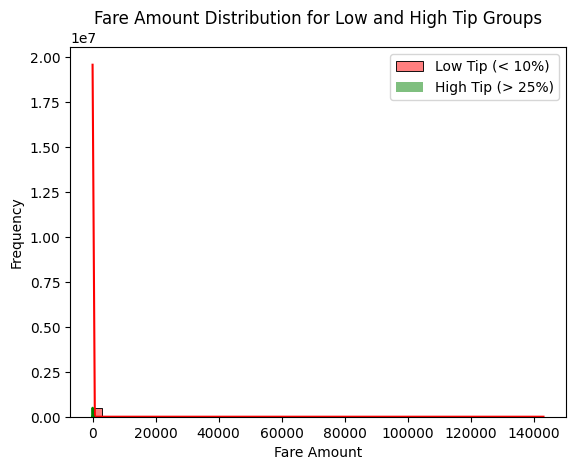

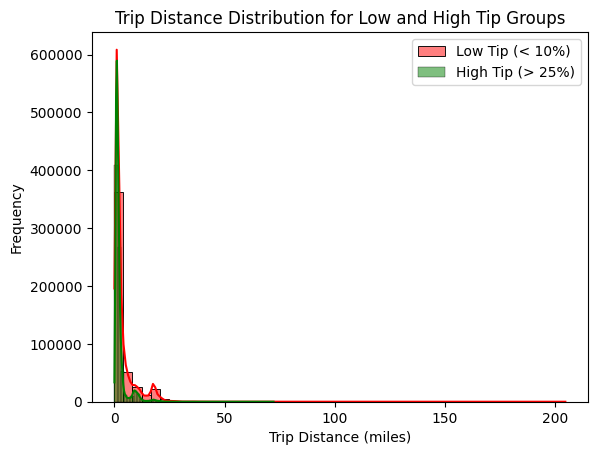

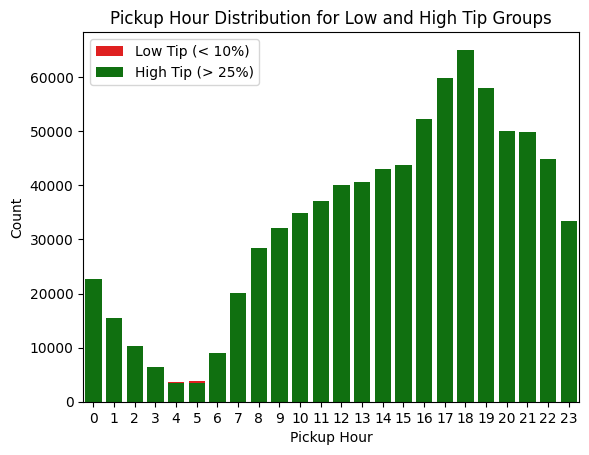

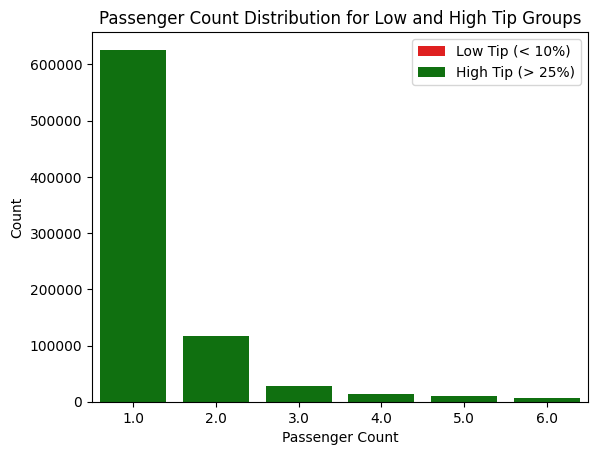

In [266]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

low_tip_df = df[df['tip_percentage'] < 10]
high_tip_df = df[df['tip_percentage'] > 25]

low_tip_stats = low_tip_df.describe()
high_tip_stats = high_tip_df.describe()

print("Low Tip Group (Tip Percentage < 10%)")
print(low_tip_stats[['fare_amount', 'trip_distance', 'passenger_count', 'pickup_hour']])
print("\nHigh Tip Group (Tip Percentage > 25%)")
print(high_tip_stats[['fare_amount', 'trip_distance', 'passenger_count', 'pickup_hour']])

sns.histplot(low_tip_df['fare_amount'], color='red', label='Low Tip (< 10%)', kde=True, bins=50)
sns.histplot(high_tip_df['fare_amount'], color='green', label='High Tip (> 25%)', kde=True, bins=50)
plt.legend()
plt.title('Fare Amount Distribution for Low and High Tip Groups')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.show()


sns.histplot(low_tip_df['trip_distance'], color='red', label='Low Tip (< 10%)', kde=True, bins=50)
sns.histplot(high_tip_df['trip_distance'], color='green', label='High Tip (> 25%)', kde=True, bins=50)
plt.legend()
plt.title('Trip Distance Distribution for Low and High Tip Groups')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Frequency')
plt.show()

sns.countplot(data=low_tip_df, x='pickup_hour', color='red', label='Low Tip (< 10%)')
sns.countplot(data=high_tip_df, x='pickup_hour', color='green', label='High Tip (> 25%)')
plt.legend()
plt.title('Pickup Hour Distribution for Low and High Tip Groups')
plt.xlabel('Pickup Hour')
plt.ylabel('Count')
plt.show()

sns.countplot(data=low_tip_df, x='passenger_count', color='red', label='Low Tip (< 10%)')
sns.countplot(data=high_tip_df, x='passenger_count', color='green', label='High Tip (> 25%)')
plt.legend()
plt.title('Passenger Count Distribution for Low and High Tip Groups')
plt.xlabel('Passenger Count')
plt.ylabel('Count')
plt.show()

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

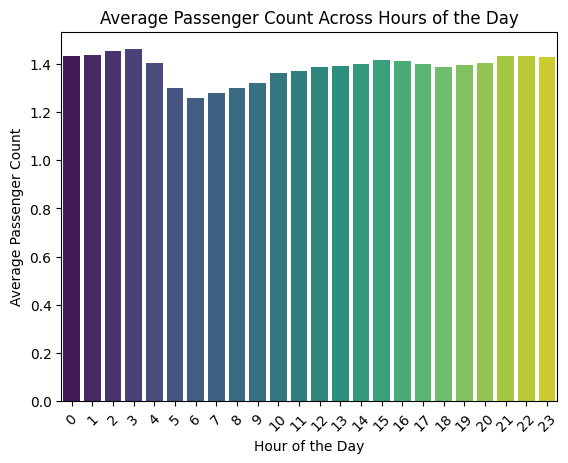

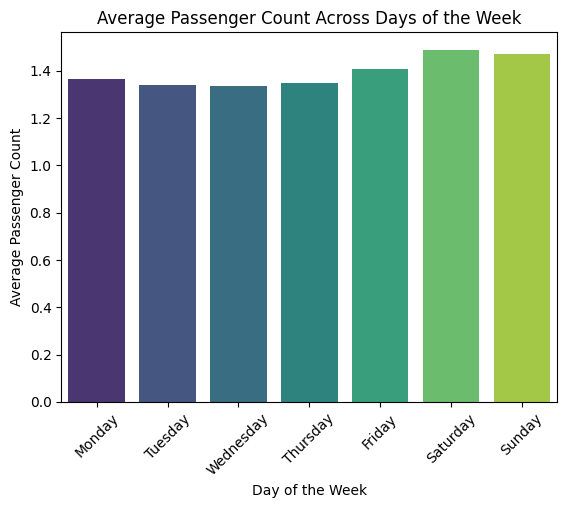

In [268]:
# See how passenger count varies across hours and days

df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_day'] = df['tpep_pickup_datetime'].dt.day_name()  # Day of the week

hourly_passenger_count = df.groupby('pickup_hour')['passenger_count'].mean().reset_index()
daily_passenger_count = df.groupby('pickup_day')['passenger_count'].mean().reset_index()

order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_passenger_count['pickup_day'] = pd.Categorical(daily_passenger_count['pickup_day'], categories=order, ordered=True)
daily_passenger_count = daily_passenger_count.sort_values('pickup_day')

sns.barplot(data=hourly_passenger_count, x='pickup_hour', y='passenger_count', palette='viridis')
plt.title('Average Passenger Count Across Hours of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Passenger Count')
plt.xticks(rotation=45)
plt.show()

sns.barplot(data=daily_passenger_count, x='pickup_day', y='passenger_count', palette='viridis')
plt.title('Average Passenger Count Across Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Passenger Count')
plt.xticks(rotation=45)
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

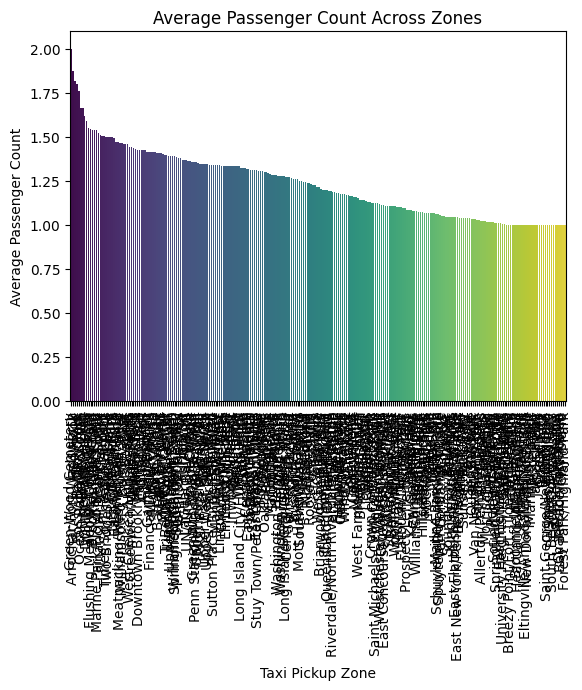

In [270]:
# How does passenger count vary across zones

zone_passenger_count = df.groupby('PULocationID')['passenger_count'].mean().reset_index()
zones_merged = pd.merge(zone_passenger_count, zones[['LocationID', 'zone']], left_on='PULocationID', right_on='LocationID', how='left')
zones_merged_sorted = zones_merged.sort_values('passenger_count', ascending=False)

sns.barplot(data=zones_merged_sorted, x='zone', y='passenger_count', palette='viridis')
plt.title('Average Passenger Count Across Zones')
plt.xlabel('Taxi Pickup Zone')
plt.ylabel('Average Passenger Count')
plt.xticks(rotation=90)
plt.show()

In [272]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

zones_with_trips = pd.merge(zones, df.groupby('PULocationID')['passenger_count'].mean().reset_index(),left_on='LocationID', right_on='PULocationID', how='left')
zones_with_trips['average_passenger_count'] = zones_with_trips.groupby('LocationID')['passenger_count'].transform('mean')
zones_with_trips[['zone', 'average_passenger_count']].head()

,zone,average_passenger_count
0,Newark Airport,1.617225
1,Jamaica Bay,1.000000
2,Allerton/Pelham Gardens,1.025000
3,Alphabet City,1.439627
4,Arden Heights,1.000000


Find out how often surcharges/extra charges are applied to understand their prevalance

In [274]:
surcharge_columns = ['extra', 'mta_tax', 'improvement_surcharge', 'congestion_surcharge', 'airport_fee']
surcharge_prevalence = {}
for column in surcharge_columns:
    non_zero_count = (df[column] > 0).sum()
    non_zero_percentage = (non_zero_count / len(df)) * 100
    surcharge_prevalence[column] = {
        'Non-zero count': non_zero_count,
        'Prevalence (%)': non_zero_percentage
    }

surcharge_prevalence_df = pd.DataFrame(surcharge_prevalence).T
surcharge_prevalence_df

,Non-zero count,Prevalence (%)
extra,1105741.0,61.374171
mta_tax,1784914.0,99.071679
improvement_surcharge,1801023.0,99.965809
congestion_surcharge,1663032.0,92.306616
airport_fee,159242.0,8.838730


**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [276]:
# How often is each surcharge applied?

pickup_zone_surcharge = df.groupby('PULocationID')[surcharge_columns].apply(lambda x: (x > 0).sum())
pickup_zone_surcharge_percentage = (pickup_zone_surcharge / len(df)) * 100
dropoff_zone_surcharge = df.groupby('DOLocationID')[surcharge_columns].apply(lambda x: (x > 0).sum())
dropoff_zone_surcharge_percentage = (dropoff_zone_surcharge / len(df)) * 100
pickup_hour_surcharge = df.groupby('pickup_hour')[surcharge_columns].apply(lambda x: (x > 0).sum())
pickup_hour_surcharge_percentage = (pickup_hour_surcharge / len(df)) * 100

df['pickup_dayofweek'] = df['tpep_pickup_datetime'].dt.dayofweek
pickup_day_surcharge = df.groupby('pickup_dayofweek')[surcharge_columns].apply(lambda x: (x > 0).sum())
pickup_day_surcharge_percentage = (pickup_day_surcharge / len(df)) * 100

print("Pickup Zone Surcharge Prevalence:")
print(pickup_zone_surcharge_percentage)

print("\nDropoff Zone Surcharge Prevalence:")
print(dropoff_zone_surcharge_percentage)

print("\nPickup Hour Surcharge Prevalence:")
print(pickup_hour_surcharge_percentage)

print("\nPickup Day of Week Surcharge Prevalence:")
print(pickup_day_surcharge_percentage)

Pickup Zone Surcharge Prevalence:
                 extra   mta_tax  improvement_surcharge  congestion_surcharge  \
PULocationID                                                                    
1             0.000555  0.001388               0.011601              0.000056   
2             0.000000  0.000111               0.000111              0.000111   
3             0.000000  0.002109               0.002220              0.000000   
4             0.081259  0.099909               0.101075              0.098022   
5             0.000000  0.000722               0.000722              0.000000   
...                ...       ...                    ...                   ...   
261           0.293788  0.516641               0.525799              0.517196   
262           0.617993  1.287050               1.290214              1.285829   
263           1.106381  1.898049               1.903656              1.885339   
264           0.515808  0.942697               0.955907              0.7071

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

1. **Peak Hour Dispatching**: Increase fleet availability during rush hours (4 PM - 7 PM) and early mornings (7 AM - 9 AM) to ensure sufficient coverage.
2. **High-Demand Zones**: Proactively position taxis in high-demand areas like Manhattan and airports ahead of peak times to meet customer needs.
3. **Fleet Management**: Leverage predictive analytics to optimize the distribution of the fleet based on real-time demand, ensuring better coverage.
4. **Route Optimization**: Utilize traffic data to avoid congested areas, reducing trip durations and improving overall operational efficiency.
5. **Dynamic Pricing**: Apply surge pricing during peak hours and in high-demand zones to balance supply with demand, maximizing fleet utilization.
6. **Nighttime Focus**: Increase fleet availability in nightlife areas and airports during late-night hours (11 PM - 5 AM) to cater to evening travelers.
7. **Surcharge Transparency**: Provide clear and transparent pricing and surcharge information to enhance the customer experience and avoid misunderstandings.
8. **Customer Experience**: Enhance satisfaction through smoother experiences, loyalty programs, and better vehicle conditions, encouraging tips and repeat business.


**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

1. **Peak Hour Zones**: Position taxis in high-demand areas during peak hours (e.g., office districts, transportation hubs) to capture more rides. For example, increase the fleet around train stations during rush hours (8 AM - 9 AM and 5 PM - 7 PM).
2. **Nighttime Focus**: Deploy additional taxis around nightlife districts and airports during the nighttime (11 PM - 5 AM), when demand tends to rise.
3. **Airport and Tourist Zones**: Ensure taxis are available at or near airports, tourist attractions, and convention centers, where trips are frequent, especially on weekends and holidays.
4. **High Traffic Areas**: Areas with high passenger demand during weekdays (like business districts) and weekends (such as shopping malls) should have more taxis stationed for quick response.
5. **Off-Peak Adjustments**: During low-traffic hours or days (like early mornings or midweek), relocate taxis to higher-demand zones or put them in standby mode to optimize supply and reduce idle time.
6. **Proximity to High Fare Zones**: Position taxis closer to areas with high fares and longer trips, such as suburbs or industrial areas where rides tend to have longer durations.
7. **Surge Areas**: During holidays or special events, reposition taxis based on event-specific demand trends, using historical data to predict hotspots and optimize fleet usage.
8. **Low Traffic Zones**: Reduce the number of taxis in areas with low trip counts (e.g., residential areas during work hours) to optimize fleet distribution elsewhere.
9. **Passenger Count Focus**: Position more taxis in areas with higher passenger count trends to accommodate larger groups, such as hotels, conventions, and airports.
10. **Data-Driven Adjustments**: Continuously analyze trip patterns in real-time to dynamically adjust the fleet and position taxis where demand is increasing or expected to rise, ensuring optimal fleet utilization at all times.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

1. **Dynamic Pricing (Surge Pricing)**: Increase fares during peak demand hours, events, and in busy zones to balance supply and demand.
2. **Time-Based Pricing**: Offer discounted fares during off-peak hours and raise prices during peak times to manage demand effectively.
3. **Zone-Based Pricing**: Apply higher fares for longer trips or busy areas (e.g., airports) and lower fares for quieter zones with less demand.
4. **Distance-Based Tiers**: Set flat rates for short trips, and variable rates for longer trips, with pricing depending on the time of day.
5. **Passenger Count Pricing**: Charge more for larger groups and offer discounts for smaller groups, based on the number of passengers.
6. **Competitor-Responsive Pricing**: Adjust fares to remain competitive, taking into account the rates set by other service providers.
7. **Tip-Based Incentives**: Offer loyalty rewards or tip bonuses to encourage customers to give higher tips, ultimately boosting overall revenue.
8. **Loyalty Programs**: Provide discounts or fixed fares for frequent users or subscription-based customers to incentivize repeat business.
9. **Surcharge Adjustments**: Apply surcharges for factors like weather, special events, or heavy traffic to ensure proper compensation during challenging conditions.
10. **Distance/Duration Flexibility**: Adjust fares based on trip length and duration, offering discounts for quicker trips to improve efficiency.
11. **Geo-Targeted Pricing**: Set prices based on location demand, providing real-time fare information depending on the zone, ensuring fair and dynamic pricing.